# Rules:

1) Code will be tested on python 3.7 and 3.8

2) Testing sets can not be used for training, but there isn't any mention of not using them for validation

3) There will be 3 stages of testing, public test set, private testset1 and private testset2. Public testset is just for leader board, top 10 results on private test1 will be shortlisted while top 3 among those on private testset3 will be winners.

4) Can use external data-sources for training, but they should be shared and made public

5) Evaluation metric would be Mean averag precision(mAP): https://pypi.org/project/mean-average-precision/. Values will be rounded to third decimal place

6) Submission of results will be done in json format, similar to traing_gt.json. Further files have also been shared.

# Repositries:

## Xuannianz EfficientDet github repo:

Link : https://github.com/xuannianz/EfficientDet
1) Add these lines before importing utils.compute_overlap in utils/anchors.py

import pyximport

pyximport.install()

2) Make sure your xsize/32 is int and even, as well as ysize/32 is int and even.

3) In coco.py, make sure you set proper paths for annotations in self.coco and for images in load_image

4) In efficientnet.py lines 378 remove or comment out these lines:

if backend.backend() == 'tensorflow':

            from tensorflow.python.keras.backend import is_keras_tensor
            
        else:
        
            is_keras_tensor = backend.is_keras_tensor
            
5) In model.py, for class BoxNet and class ClassNet, update the line self.level+=1 in call function with:

if self.level < self.depth:

            self.level += 1
            
        else:
        
            self.level = 0
         
6) install Keras-Applications (pip install Keras-Applications)   

7) These changes work with tensorflow-gpu==2.8.0, so make sure you do not install tensorflow or tensorflow-gpu version added in requirements.text, instaed change it to 2.8.0.

8) The cuDNN compiler needed for this code is 8.1.0, so make sure you have it installed. For google colab gpu I did it with !apt install --allow-change-held-packages libcudnn8=8.1.0.77-1+cuda11.2.

## Tensorflow object detection API

Link: https://github.com/tensorflow/models/tree/master/research/object_detection

Official Documentation: https://tensorflow-object-detection-api-tutorial.readthedocs.io/

Follow the installation from documentation to get your system/ virtual env ready for use . Most commands like cp won't work as they are for linux. use copy command instaed in windows. You can always export your virual env or conda env using ipykernel command (you can use help from this article https://medium.com/@nrk25693/how-to-add-your-conda-environment-to-your-jupyter-notebook-in-just-4-steps-abeab8b8d084). In this system, I have a kernel named tensorflow for this purpose

# Exploratory Data Analysis (EDA):

Move to the directory:

In [1]:
cd "D:\LUMS_RA\Motive_AI_Challenge\train"

D:\LUMS_RA\Motive_AI_Challenge\train


## Dataset Details: 

### Images:
Format:                  JPEG

Total Training Images:   39998

### Ground Truth Labels:
Format:                  json

Total Annotations:       255420

Total Categories:        4 categories (Car : 1, Truck : 2, Stop-sign: 3, Traffic-Light: 4)

JSON Division:

1) 'images':

        (i)   'file_name':      name of file as string

        (ii)  'id':            integer speciying id of this image

        (iii) 'height':        integer representing height of image

        (iv)  'width':         integer representing width of image
                         
2) 'annotations':

        (i)   'image_id':      integer repsenting the id of image it belongs to

        (ii)  'bbox':          list containing four elements [x,y,width,height]. x, y are top left corner of label

        (iii) 'category_id':   integer representing id of class for this label

        (iv)  'id':            integer representing the unique id of this label
                         
3) 'categories':


        (i)   'id':            integer representing the unique id of that category

        (ii)  'name':          name of that category

        (iii) 'supercategory:  supercategory for this class, is always none

## Visualization of Images:

In [80]:
%matplotlib inline

In [1]:
import json
import numpy as np
import matplotlib.pyplot as plt

# Opening JSON file
f = open('train_gt.json')
  
# returns JSON object as 
# a dictionary
data = json.load(f)
class_info_dict= {
    1: [(255,0,0), 'Car'],
    2: [(0,255,0), 'Truck'],
    3: [(0,0,255), 'StopSign'],
    4: [(255,255,0), 'TrafficLight'],
}

FileNotFoundError: [Errno 2] No such file or directory: 'train_gt.json'

In [ ]:
def annotate_image(img, labels):
    for entry in labels:
        color = class_info_dict[entry[0]][0]
        text = class_info_dict[entry[0]][1]
        x_min,y_min = entry[1][0],entry[1][1]
        x_max,y_max = x_min+entry[1][2],y_min+entry[1][3]
        img = cv2.rectangle(img,(x_min,y_min),(x_max,y_max), color, 2)
        #img = cv2.putText(img, text, (x_min, y_min-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, color, 2)
    
    return img

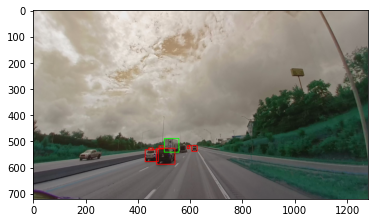

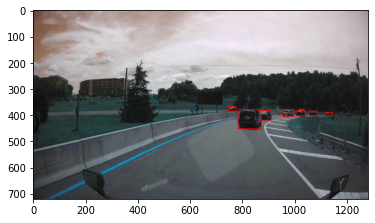

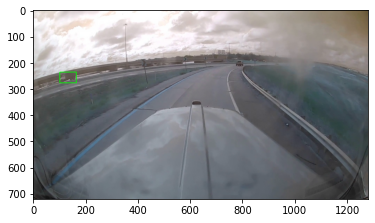

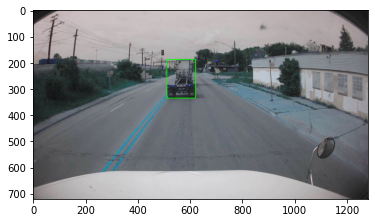

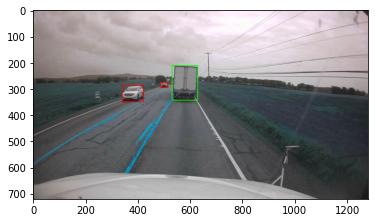

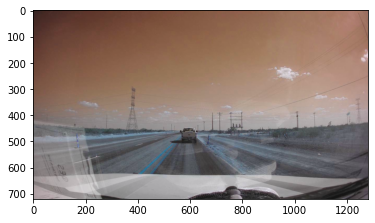

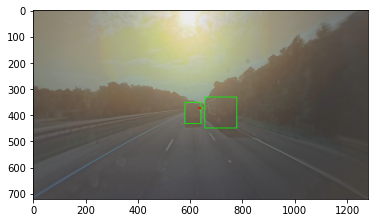

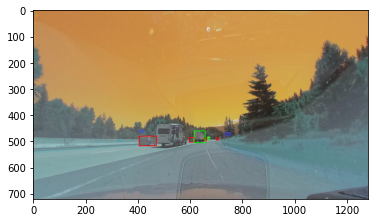

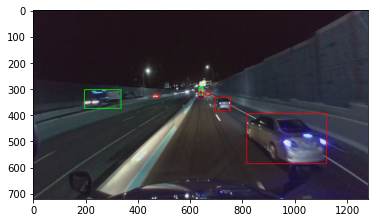

In [105]:
Images_base_path = "D:\\LUMS_RA\\Motive_AI_Challenge\\train\\train_images"
images = 10

image_dict = np.random.choice(data['images'],images)

image_names = [dic['file_name'] for dic in image_dict]
image_paths = [os.path.join(Images_base_path,name) for name in image_names]
image_ids = [dic['id'] for dic in image_dict]

id_path_dict = dict(zip(image_ids, image_paths))
annots_dict_list = data['annotations']
           
for i in range(images):
    key = (image_ids[i])
    image_path = id_path_dict[key]
    img = cv2.imread(image_path)
    cat_bbox_list = [(annot_dict['category_id'],annot_dict['bbox']) for annot_dict in annots_dict_list if (annot_dict['image_id']==key)]
    img = annotate_image(img, cat_bbox_list)
    plt.imshow(img)
    plt.show()

## Image Aspect ratio/sizes:

In [22]:
import json
import numpy as np

# Opening JSON file
f = open('train_gt.json')
  
# returns JSON object as 
# a dictionary
data = json.load(f)

In [27]:
dict_list = data['images']

width_values = np.array([dic['width'] for dic in dict_list])
height_values = np.array([[dic['height'] for dic in dict_list]])

aspect_ratio_values = width_values/height_values

print("Unique Widths: {}".format(np.unique(width_values)))
print("Unique Heights: {}".format(np.unique(height_values)))
print("Unique aspect Ratios: {}".format(np.unique(aspect_ratio_values)))
    

Unique Widths: [1280]
Unique Heights: [720]
Unique aspect Ratios: [1.77777778]


All images have same size of 1280 x 720. Aspect ratio is also same i.e. 1.78

## Label Distribution:

In [28]:
import json
import numpy as np
import matplotlib.pyplot as plt

# Opening JSON file
f = open('train_gt.json')
  
# returns JSON object as 
# a dictionary
data = json.load(f)

Total Labels: 255420
Categories Names: ['Car' 'Truck' 'StopSign' 'traffic_lights']
Category  counts: [204919  36912   3747   9842]


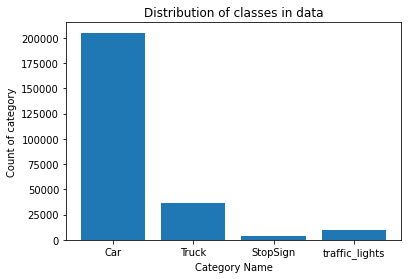

In [45]:
dict_list = data['annotations']
category_list = data['categories']

category_ids = np.array([dic['category_id'] for dic in dict_list])
category_names = np.array([dic['name'] for dic in category_list])

print("Total Labels: {}".format(len(category_ids)))
print("Categories Names: {}".format(category_names))

hists, _ = np.histogram(category_ids, bins=len(category_names), range=(min(category_ids), max(category_ids)))
print("Category  counts: {}".format(hists))

plt.bar(category_names,hists,)
plt.xlabel("Category Name")
plt.ylabel("Count of category")
plt.title("Distribution of classes in data")
plt.show()

## Average Width, Height and Area per class:

In [42]:
import json
import numpy as np
import matplotlib.pyplot as plt

# Opening JSON file
f = open('train_gt.json')
  
# returns JSON object as 
# a dictionary
data = json.load(f)

Total Labels: 255420
Categories Names: ['Car', 'Truck', 'StopSign', 'traffic_lights']
Average Widths: [39.13640512 71.71792371 34.53055778 10.61186751]
Average Heights: [27.42722734 62.04128739 42.87830264 20.45945946]
Average Areas: [ 2631.70094525 12692.2316049   2156.01894849   292.58158911]


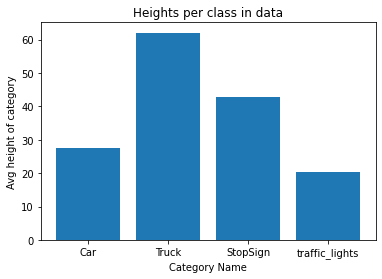

In [64]:
dict_list = data['annotations']
category_list = data['categories']

keys_list = np.array([dic['id'] for dic in category_list])
values_list = np.array([dic['name'] for dic in category_list])
category_key_dict = dict(zip(keys_list, values_list))

category_ids = np.array([dic['category_id'] for dic in dict_list])
widths = np.array([dic['bbox'][2] for dic in dict_list])
heights = np.array([dic['bbox'][3] for dic in dict_list])
Areas = widths*heights

print("Total Labels: {}".format(len(category_ids)))

total_categories = np.sort(np.unique(category_ids))
print("Categories Names: {}".format([category_key_dict[key] for key in total_categories]))

Avg_widths = np.array([])
Avg_heights = np.array([])
Avg_Areas = np.array([])

category_names = np.array([])
for key,value in category_key_dict.items():
    class_mask = np.where(category_ids == key)[0]
    
    cat_width_mean = np.mean(widths[class_mask])
    Avg_widths = np.append(Avg_widths,cat_width_mean)
    
    cat_height_mean = np.mean(heights[class_mask])
    Avg_heights = np.append(Avg_heights,cat_height_mean)
    
    cat_area_mean = np.mean(Areas[class_mask])
    Avg_Areas = np.append(Avg_Areas,cat_area_mean)
    
    category_names = np.append(category_names,value)

print("Average Widths: {}".format(Avg_widths))
print("Average Heights: {}".format(Avg_heights))  
print("Average Areas: {}".format(Avg_Areas))

plt.bar(category_names,Avg_widths)
plt.xlabel("Category Name")
plt.ylabel("Avg width of category")
plt.title("Widths per class in data")
plt.show()

plt.bar(category_names,Avg_heights)
plt.xlabel("Category Name")
plt.ylabel("Avg height of category")
plt.title("Heights per class in data")
plt.show()

plt.bar(category_names,Avg_Areas)
plt.xlabel("Category Name")
plt.ylabel("Avg area of category")
plt.title("Areas per class in data")
plt.show()

## Labels/bbox sizes and dimensions:

In [ ]:
import json
import numpy as np
import matplotlib.pyplot as plt

# Opening JSON file
f = open('train_gt.json')
  
# returns JSON object as 
# a dictionary
data = json.load(f)

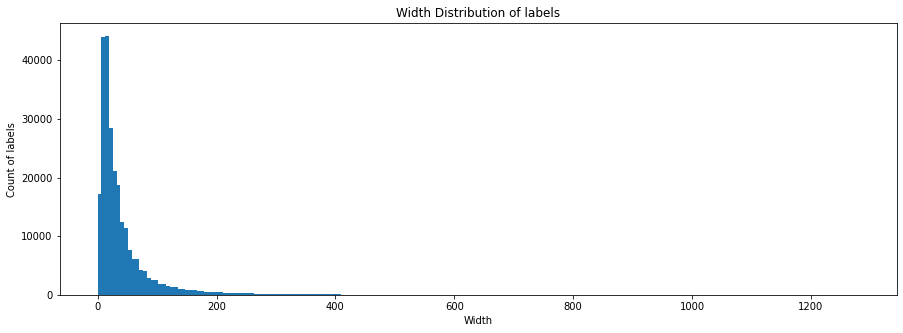

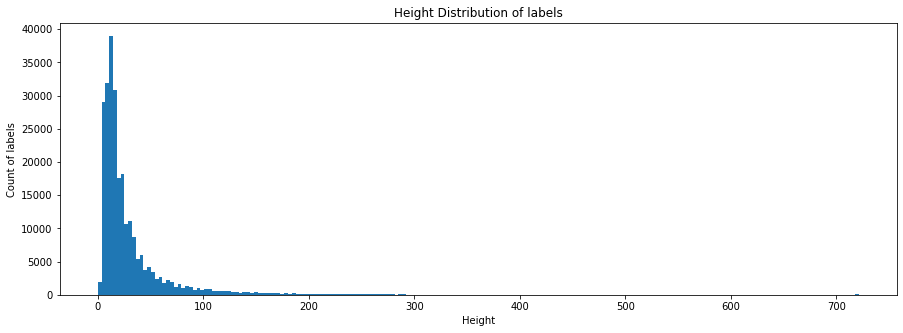

In [63]:
dict_list = data['annotations']

widths = np.array([dic['bbox'][2] for dic in dict_list])
heights = np.array([dic['bbox'][3] for dic in dict_list])
Areas = widths*heights

num_bins = 200

plt.figure(figsize=(15,5))
plt.hist(widths,bins=num_bins)
plt.xlabel("Width")
plt.ylabel("Count of labels")
plt.title("Width Distribution of labels")
plt.show()

plt.figure(figsize=(15,5))
plt.hist(heights,bins=num_bins)
plt.xlabel("Height")
plt.ylabel("Count of labels")
plt.title("Height Distribution of labels")
plt.show()

plt.figure(figsize=(15,5))
plt.hist(Areas,bins=num_bins)
plt.xlabel("Area")
plt.ylabel("Count of labels")
plt.title("Area Distribution of labels")
plt.show()

## Size distribution per class:

In [ ]:
import json
import numpy as np
import matplotlib.pyplot as plt

# Opening JSON file
f = open('train_gt.json')
  
# returns JSON object as 
# a dictionary
data = json.load(f)

In [70]:
def plot_sizes(class_id,class_label,num_bins):
    dict_list = data['annotations']
    category_ids = np.array([dic['category_id'] for dic in dict_list])
    mask = np.where(category_ids == class_id)[0]
    
    widths = np.array([dic['bbox'][2] for dic in dict_list])
    cat_widths = widths[mask]
    
    print(len(widths))
    print(len(cat_widths))

    heights = np.array([dic['bbox'][3] for dic in dict_list])
    cat_heights = heights[mask]

    Areas = widths*heights
    cat_areas = Areas[mask]

    plt.figure(figsize=(15,5))
    plt.hist(cat_widths,bins=num_bins)
    plt.xlabel("Width")
    plt.ylabel("Number of {}".format(class_label))
    plt.title("Width Distribution of {}".format(class_label))
    plt.show()

    plt.figure(figsize=(15,5))
    plt.hist(cat_heights,bins=num_bins)
    plt.xlabel("Height")
    plt.ylabel("Number of {}".format(class_label))
    plt.title("Height Distribution of {}".format(class_label))
    plt.show()

    plt.figure(figsize=(15,5))
    plt.hist(cat_areas,bins=num_bins)
    plt.xlabel("Area")
    plt.ylabel("Number of {}".format(class_label))
    plt.title("Area Distribution of {}".format(class_label))
    plt.show()

### 1: Cars

255420
204919


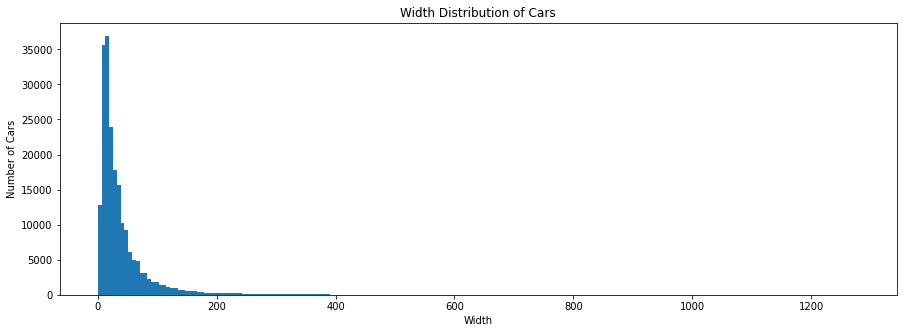

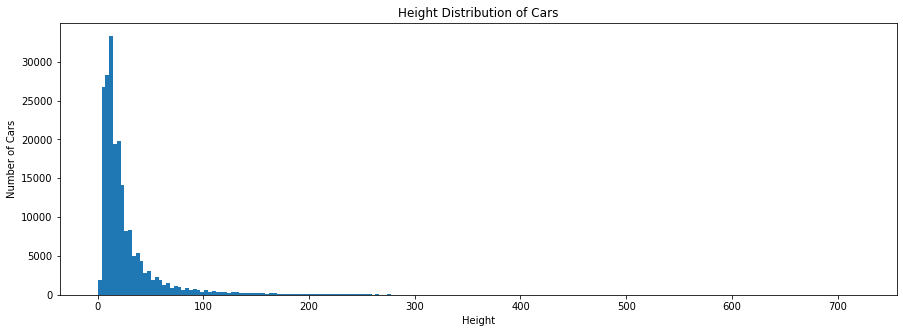

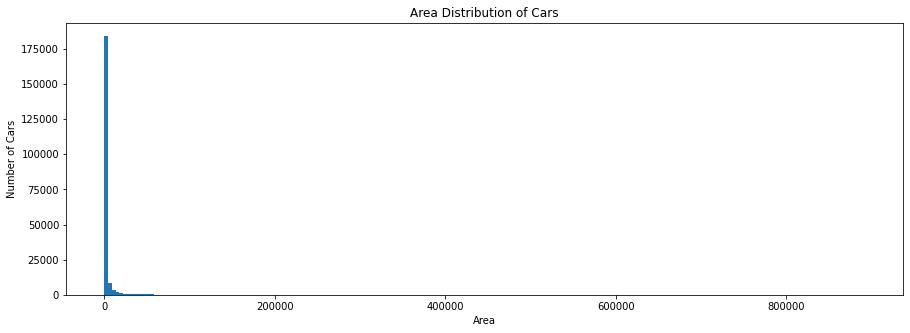

In [71]:
plot_sizes(1,"Cars",200)

### 2: Trucks

255420
36912


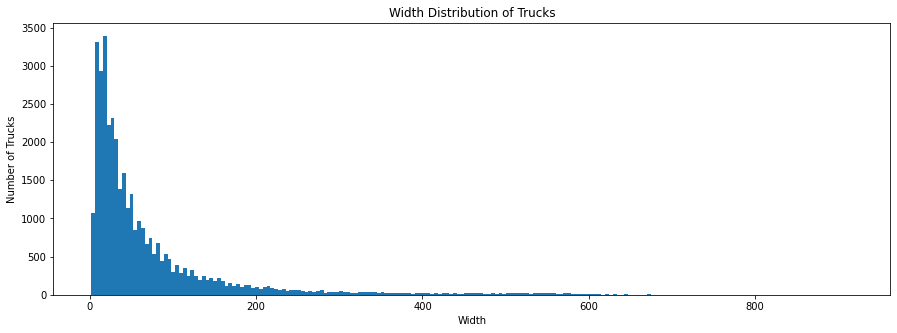

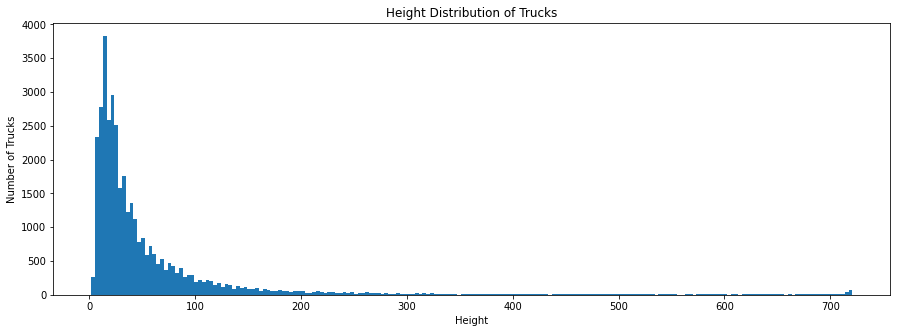

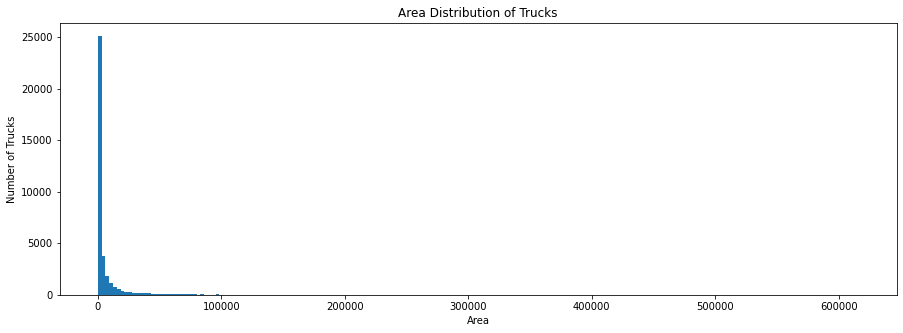

In [72]:
plot_sizes(2,"Trucks",200)

### 3: StopSign

255420
3747


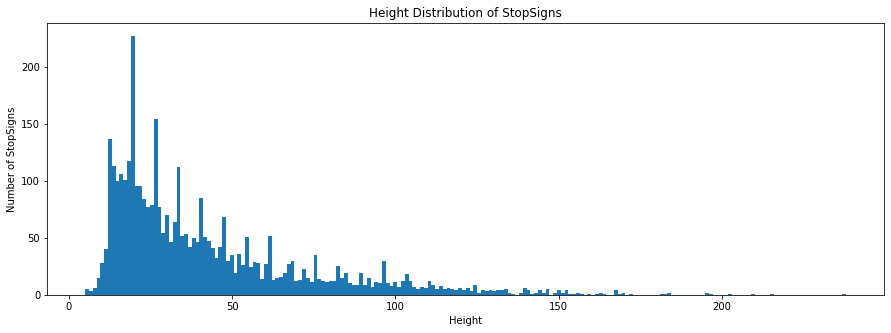

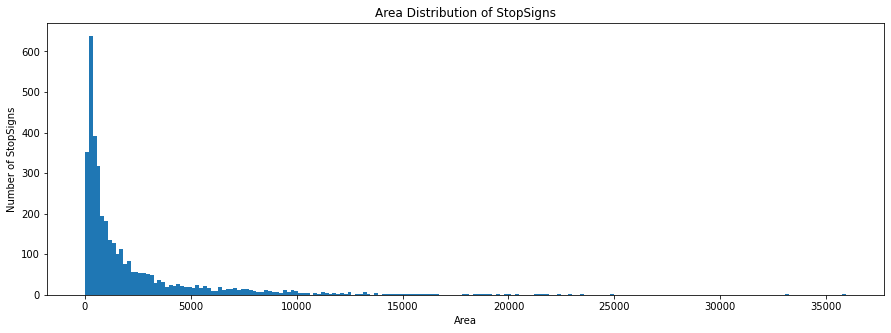

In [74]:
plot_sizes(3,"StopSigns",200)

### 4: TrafficLights

255420
9842


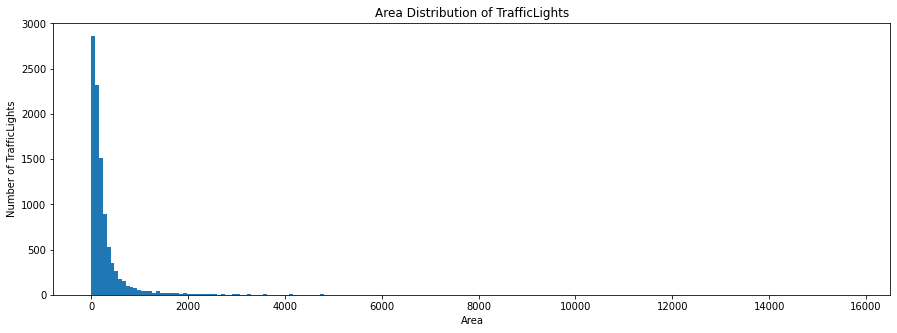

In [75]:
plot_sizes(4,"TrafficLights",200)

## Annotation Distribution in Car_Truck Data

In [477]:
from pycocotools.coco import COCO
import matplotlib.pyplot as plt

In [478]:
%matplotlib inline

loading annotations into memory...
Done (t=0.37s)
creating index...
index created!
Total Images: 46172
Images with Car: 15329, Truck: 2289, Car+Truck: 14277, No Labels: 1537


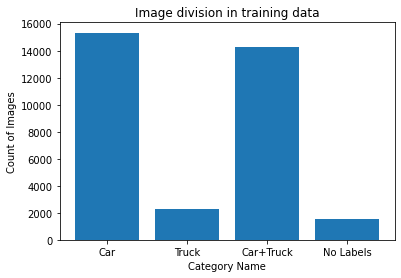

Total Anootations: 202657
Annotations with Car only images: 78638, Truck only images: 3444, Car+Truck images: 120575, no label images: 0


In [486]:
json_path = "D:\\LUMS_RA\\Motive_AI_Challenge\\train\\Car_Truck\\train_gt.json"

coco = COCO(json_path)
total_imgs = coco.getImgIds()
car_imgs = (coco.getImgIds(catIds=[1]))
truck_imgs = (coco.getImgIds(catIds=[2]))

car_truck = (coco.getImgIds(catIds=[1,2]))
car_only = [img for img in car_imgs if img not in car_truck]
truck_only = [img for img in truck_imgs if img not in car_truck]
total_annotated_imgs = car_imgs+truck_imgs
print("Total Images: {}".format(len((total_annotated_imgs))))
print("Images with Car: {}, Truck: {}, Car+Truck: {}, No Labels: {}".format(len(car_only),len(truck_only),len(car_truck),len(total_imgs)-len(set(total_annotated_imgs))))

plt.bar(["Car", "Truck", "Car+Truck", "No Labels"],[len(car_only),len(truck_only),len(car_truck),len(total_imgs)-len(set(total_annotated_imgs))],)
plt.xlabel("Category Name")
plt.ylabel("Count of Images")
plt.title("Image division in training data")
plt.show()

car_img_annots = coco.getAnnIds(car_only)
truck_img_annots = coco.getAnnIds(truck_only)
car_truck_imgs_annots = coco.getAnnIds(car_truck)
no_labels = coco.getAnnIds([img for img in total_imgs if img not in total_annotated_imgs])

print("Total Anootations: {}".format(len(coco.getAnnIds())))
print("Annotations with Car only images: {}, Truck only images: {}, Car+Truck images: {}, no label images: {}".format(len(car_img_annots),len(truck_img_annots),len(car_truck_imgs_annots),len(no_labels)))
plt.bar(["Car Only", "Truck Only", "Both Car+Truck", "No Labels"],[len(car_img_annots),len(truck_img_annots),len(car_truck_imgs_annots),len(no_labels)],)
plt.xlabel("Images with categories")
plt.ylabel("Count of Annotations")
plt.title("Annotation division in Category Images")
plt.show()

Total Anootations in mixed images: 120575
Annotations of Cars: 93216, Trucks: 27359


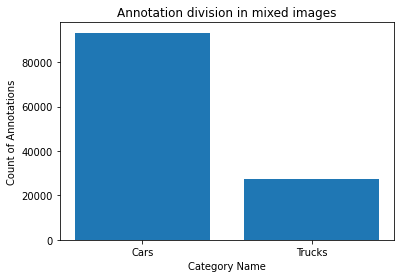

In [487]:
mixed_annots = coco.loadAnns(car_truck_imgs_annots)
truck_anns = [ann for ann in mixed_annots if ann['category_id'] == 2]
cars_anns = [ann for ann in mixed_annots if ann['category_id'] == 1]

print("Total Anootations in mixed images: {}".format(len(mixed_annots)))
print("Annotations of Cars: {}, Trucks: {}".format(len(cars_anns),len(truck_anns)))
plt.bar(["Cars", "Trucks"],[len(cars_anns),len(truck_anns)],)
plt.xlabel("Category Name")
plt.ylabel("Count of Annotations")
plt.title("Annotation division in mixed images")
plt.show()

# Training

## Xuannianz EfficientDET

By making above mentioned changes in repositries, we can train the model from this repo. I have trained it from colab and notebook named motive can be found from drive. We are still not using this repo

## Tensorflow Object Detection API

We are trying to use trained coco models as we are facing memory issues in training high level models (EfficieNet D7). Neverthless, we have trained D0 on local GPU (Sir Ishaq)

# Inferences from Model

## Trained Coco Model

This demo will take you through the steps of running an "out-of-the-box" TensorFlow 2 compatible
detection model on a collection of images. More specifically, in this example we will be using
the `Saved Model Format <https://www.tensorflow.org/guide/saved_model>`__ to load the model.

### Load the test images

First we will Load the images that we will use later.

In [3]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'    # Suppress TensorFlow logging (1)
import pathlib
import tensorflow as tf

IMAGE_PATHS = ["D:\\LUMS_RA\\Motive_AI_Challenge\\train\\train_images\\36871db7-67c1-438e-8dd8-a8c7facf4522.jpeg"]

print(IMAGE_PATHS)

['D:\\LUMS_RA\\Motive_AI_Challenge\\train\\train_images\\36871db7-67c1-438e-8dd8-a8c7facf4522.jpeg']


### Download the model

The code snippet shown below is used to download the pre-trained object detection model we shall
use to perform inference. The particular detection algorithm we will use is the
`CenterNet HourGlass104 1024x1024`. More models can be found in the `TensorFlow 2 Detection Model Zoo <https://github.com/tensorflow/models/blob/master/research/object_detection/g3doc/tf2_detection_zoo.md>`

To use a different model you will need the URL name of the specific model. This can be done as
follows:

1. Right click on the `Model name` of the model you would like to use;
2. Click on `Copy link address` to copy the download link of the model;
3. Paste the link in a text editor of your choice. You should observe a link similar to ``download.tensorflow.org/models/object_detection/tf2/YYYYYYYY/XXXXXXXXX.tar.gz``;
4. Copy the ``XXXXXXXXX`` part of the link and use it to replace the value of the ``MODEL_NAME`` variable in the code shown below;
5. Copy the ``YYYYYYYY`` part of the link and use it to replace the value of the ``MODEL_DATE`` variable in the code shown below.

For example, the download link for the model used below is: ``download.tensorflow.org/models/object_detection/tf2/20200711/centernet_hg104_1024x1024_coco17_tpu-32.tar.gz``

In [4]:
def download_model(model_name, model_date):
    base_url = 'http://download.tensorflow.org/models/object_detection/tf2/'
    model_file = model_name + '.tar.gz'
    model_dir = tf.keras.utils.get_file(fname=model_name,
                                        origin=base_url + model_date + '/' + model_file,
                                        untar=True)
    return str(model_dir)

MODEL_DATE = '20200711'
MODEL_NAME = 'efficientdet_d7_coco17_tpu-32'
#PATH_TO_MODEL_DIR = download_model(MODEL_NAME, MODEL_DATE)

PATH_TO_MODEL_DIR = "C:\\Users\\m_waseem\\.keras\\datasets\\efficientdet_d7_coco17_tpu-32"
print(PATH_TO_MODEL_DIR)

C:\Users\m_waseem\.keras\datasets\efficientdet_d7_coco17_tpu-32


### Download the labels

The coode snippet shown below is used to download the labels file (.pbtxt) which contains a list
of strings used to add the correct label to each detection (e.g. person). Since the pre-trained
model we will use has been trained on the COCO dataset, we will need to download the labels file
corresponding to this dataset, named ``mscoco_label_map.pbtxt``. A full list of the labels files
included in the TensorFlow Models Garden can be found `here <https://github.com/tensorflow/models/tree/master/research/object_detection/data>`__.

In [7]:
def download_labels(filename):
    base_url = 'https://raw.githubusercontent.com/tensorflow/models/master/research/object_detection/data/'
    label_dir = tf.keras.utils.get_file(fname=filename,
                                        origin=base_url + filename,
                                        untar=False)
    label_dir = pathlib.Path(label_dir)
    return str(label_dir)

LABEL_FILENAME = 'mscoco_label_map.pbtxt'
#PATH_TO_LABELS = download_labels(LABEL_FILENAME)

PATH_TO_LABELS = "C:\\Users\\m_waseem\\.keras\\datasets\\mscoco_label_map.pbtxt"

### Load label map data (for plotting)

Label maps correspond index numbers to category names, so that when our convolution network
predicts `5`, we know that this corresponds to `airplane`.  Here we use internal utility
functions, but anything that returns a dictionary mapping integers to appropriate string labels
would be fine.

In [8]:
category_index = label_map_util.create_category_index_from_labelmap(PATH_TO_LABELS,
                                                                    use_display_name=True)

print(category_index)

{1: {'id': 1, 'name': 'person'}, 2: {'id': 2, 'name': 'bicycle'}, 3: {'id': 3, 'name': 'car'}, 4: {'id': 4, 'name': 'motorcycle'}, 5: {'id': 5, 'name': 'airplane'}, 6: {'id': 6, 'name': 'bus'}, 7: {'id': 7, 'name': 'train'}, 8: {'id': 8, 'name': 'truck'}, 9: {'id': 9, 'name': 'boat'}, 10: {'id': 10, 'name': 'traffic light'}, 11: {'id': 11, 'name': 'fire hydrant'}, 13: {'id': 13, 'name': 'stop sign'}, 14: {'id': 14, 'name': 'parking meter'}, 15: {'id': 15, 'name': 'bench'}, 16: {'id': 16, 'name': 'bird'}, 17: {'id': 17, 'name': 'cat'}, 18: {'id': 18, 'name': 'dog'}, 19: {'id': 19, 'name': 'horse'}, 20: {'id': 20, 'name': 'sheep'}, 21: {'id': 21, 'name': 'cow'}, 22: {'id': 22, 'name': 'elephant'}, 23: {'id': 23, 'name': 'bear'}, 24: {'id': 24, 'name': 'zebra'}, 25: {'id': 25, 'name': 'giraffe'}, 27: {'id': 27, 'name': 'backpack'}, 28: {'id': 28, 'name': 'umbrella'}, 31: {'id': 31, 'name': 'handbag'}, 32: {'id': 32, 'name': 'tie'}, 33: {'id': 33, 'name': 'suitcase'}, 34: {'id': 34, 'name'

### Load the model

Next we load the downloaded model

#### Loading from saved_model

In [5]:
import time
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils

PATH_TO_SAVED_MODEL = PATH_TO_MODEL_DIR + "/saved_model"

print('Loading model...', end='')
start_time = time.time()

# Load saved model and build the detection function
detect_fn = tf.saved_model.load(PATH_TO_SAVED_MODEL)

end_time = time.time()
elapsed_time = end_time - start_time
print('Done! Took {} seconds'.format(elapsed_time))

ckpt = False

Loading model...

Done! Took 118.90426445007324 seconds


#### Loading from checkpoints

In [26]:
import time
from object_detection.utils import label_map_util
from object_detection.utils import config_util
from object_detection.utils import visualization_utils as viz_utils
from object_detection.builders import model_builder

PATH_TO_CFG = PATH_TO_MODEL_DIR + "/pipeline.config"
PATH_TO_CKPT = PATH_TO_MODEL_DIR + "/checkpoint"

print('Loading model... ', end='')
start_time = time.time()

# Load pipeline config and build a detection model
configs = config_util.get_configs_from_pipeline_file(PATH_TO_CFG)
model_config = configs['model']
detection_model = model_builder.build(model_config=model_config, is_training=False)

# Restore checkpoint
ckpt = tf.compat.v2.train.Checkpoint(model=detection_model)
ckpt.restore(os.path.join(PATH_TO_CKPT, 'ckpt-0')).expect_partial()

@tf.function
def detect_fn(image):
    """Detect objects in image."""

    image, shapes = detection_model.preprocess(image)
    prediction_dict = detection_model.predict(image, shapes)
    detections = detection_model.postprocess(prediction_dict, shapes)

    return detections

end_time = time.time()
elapsed_time = end_time - start_time
print('Done! Took {} seconds'.format(elapsed_time))

ckpt = True

Loading model... Done! Took 28.932982444763184 seconds


### Pass Images and Visualize Results!

The code shown below loads an image, runs it through the detection model and visualizes the
detection results, including the keypoints.

Note that this will take a long time (several minutes) the first time you run this code due to
tf.function's trace-compilation --- on subsequent runs (e.g. on new images), things will be
faster.

Here are some simple things to try out if you are curious:

* Modify some of the input images and see if detection still works. Some simple things to try out here (just uncomment the relevant portions of code) include flipping the image horizontally, or converting to grayscale (note that we still expect the input image to have 3 channels).
* Print out `detections['detection_boxes']` and try to match the box locations to the boxes in the image.  Notice that coordinates are given in normalized form (i.e., in the interval [0, 1]).
* Set ``min_score_thresh`` to other values (between 0 and 1) to allow more detections in or to filter out more detections.

In [10]:
# Use this line if plots are not working
%matplotlib inline

In [29]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')   # Suppress Matplotlib warnings

def load_image_into_numpy_array(path):
    """Load an image from file into a numpy array.

    Puts image into numpy array to feed into tensorflow graph.
    Note that by convention we put it into a numpy array with shape
    (height, width, channels), where channels=3 for RGB.

    Args:
      path: the file path to the image

    Returns:
      uint8 numpy array with shape (img_height, img_width, 3)
    """
    return np.array(Image.open(path))


for image_path in IMAGE_PATHS:

    print('Running inference for {}... '.format(image_path), end='')

    image_np = load_image_into_numpy_array(image_path)

    # Things to try:
    # Flip horizontally
    # image_np = np.fliplr(image_np).copy()

    # Convert image to grayscale
    # image_np = np.tile(
    #     np.mean(image_np, 2, keepdims=True), (1, 1, 3)).astype(np.uint8)
    
    if not ckpt:
        # The input needs to be a tensor, convert it using `tf.convert_to_tensor`.
        input_tensor = tf.convert_to_tensor(image_np)
        # The model expects a batch of images, so add an axis with `tf.newaxis`.
        input_tensor = input_tensor[tf.newaxis, ...]
        label_id_offset = 0
    else:
        input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.float32)
        label_id_offset = 1

    # input_tensor = np.expand_dims(image_np, 0)
    detections = detect_fn(input_tensor)

    # All outputs are batches tensors.
    # Convert to numpy arrays, and take index [0] to remove the batch dimension.
    # We're only interested in the first num_detections.
    
    num_detections = int(detections.pop('num_detections'))
    detections = {key: value[0, :num_detections].numpy()
                   for key, value in detections.items()}
    detections['num_detections'] = num_detections

    # detection_classes should be ints.
    detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

    image_np_with_detections = image_np.copy()
    
    #print(detections)
          
    viz_utils.visualize_boxes_and_labels_on_image_array(
          image_np_with_detections,
          detections['detection_boxes'],
          detections['detection_classes']+label_id_offset,
          detections['detection_scores'],
          category_index,
          use_normalized_coordinates=True,
          max_boxes_to_draw=200,
          min_score_thresh=.30,
          agnostic_mode=False)

    plt.figure()
    plt.imshow(image_np_with_detections)
    print('Done')
plt.show()

Running inference for D:\LUMS_RA\Motive_AI_Challenge\train\train_images\36871db7-67c1-438e-8dd8-a8c7facf4522.jpeg... Done


### Predict and save required classes

Define Categories and coco to motive label id key and importing required libraries

In [19]:
import numpy as np
from PIL import Image
import json
import os

categories = [
      {
        "supercategory": "none",
        "id": 1,
        "name": "Car"
      },
      {
        "supercategory": "none",
        "id": 2,
        "name": "Truck"
      },
      {
        "supercategory": "none",
        "id": 3,
        "name": "StopSign"
      },
      {
        "supercategory": "none",
        "id": 4,
        "name": "traffic_lights"
      }
    ]

Coco_catid_to_motiveid = {3:1,8:2,13:3,10:4}

In [17]:
#Read the test set
folder_path = "D:\\LUMS_RA\\Motive_AI_Challenge\\public_testset_images\\test2_images"
images_path_list = [os.path.join(folder_path,file) for file in os.listdir(folder_path)]
print(images_path_list[0])

D:\LUMS_RA\Motive_AI_Challenge\public_testset_images\test2_images\0022b971-8948-4dc5-bb42-a6084287b50a.jpeg


JSON does not support types of float 32 so you may get error in saving into json. To remove that, we extend the class of json.JSONEncoder and use that for conversion. Use the following piece of code to extend the support of np.float32

In [20]:
class NumpyFloatValuesEncoder(json.JSONEncoder):
    def default(self, obj):
        if isinstance(obj, np.float32):
            return float(obj)
        return JSONEncoder.default(self, obj)

In [23]:
images = []
annotations = []
annot_id = 0

for i,image_path in enumerate(images_path_list[:1]):
    file_name = os.path.split(image_path)[-1]
    print("Image Number: {} ....".format(i), end='')
    image_np = np.array(Image.open(image_path))
    height = image_np.shape[0]
    width = image_np.shape[1]
    img_dict = {
        "file_name": file_name,
        "id": i,
        "height": height,
        "width": width
      }
    images.append(img_dict)
    
    if not ckpt:
        # The input needs to be a tensor, convert it using `tf.convert_to_tensor`.
        input_tensor = tf.convert_to_tensor(image_np)
        # The model expects a batch of images, so add an axis with `tf.newaxis`.
        input_tensor = input_tensor[tf.newaxis, ...]
        label_id_offset = 0
    else:
        input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.float32)
        label_id_offset = 1
        
    detections = detect_fn(input_tensor)
    
    num_detections = int(detections.pop('num_detections'))
    detections = {key: value[0, :num_detections].numpy()
                   for key, value in detections.items()}
    detections['num_detections'] = num_detections

    # detection_classes should be ints.
    detections['detection_classes'] = detections['detection_classes'].astype(np.int64)
    
    bboxes = detections['detection_boxes']
    classes = [cid+label_id_offset for cid in detections['detection_classes']]
    scores = detections['detection_scores']

    score_max = 0.3
    score_filter = np.where(scores > score_max)[0]
    bboxes = bboxes[score_filter]
    classes = classes[score_filter]
    scores = scores[score_filter]

    classes_to_filter = [3,#Car
                        8,#Truck
                        10,#Traffic Light
                        13]#StopSign

    filtered_classes = []
    filtered_bboxes = []
    filtered_scores = []
    for cid in classes_to_filter:
        id_filter = np.where(classes == cid)[0]
        filtered_classes.extend(classes[id_filter])
        filtered_bboxes.extend(bboxes[id_filter])
        filtered_scores.extend(scores[id_filter])
        #print(id_filter)
        
    for j,annot_class in enumerate(filtered_classes):
        annot_dict = {
        "image_id": i,
        "bbox": [
            filtered_bboxes[j][1] * width,
            filtered_bboxes[j][0] * height,
            (filtered_bboxes[j][3] - filtered_bboxes[j][1]) * width,
            (filtered_bboxes[j][2] - filtered_bboxes[j][0]) * height],
        "category_id": Coco_catid_to_motiveid[annot_class],
        "id": annot_id,
        "confidence": filtered_scores[j]
        }
        annotations.append(annot_dict)
        annot_id = annot_id+1
    print("Done!")

final_dict = {
    "images":images,
    "annotations":annotations,
    "categories":categories
}

json_object = json.dumps(final_dict, cls=NumpyFloatValuesEncoder)#Dump using above mentioned class
f = open('D:\\LUMS_RA\\Motive_AI_Challenge\\public_testset_images\\temp.json','w')
f.write(json_object)
f.close()

Image Number: 0 ....Done!


# Evaluate results

In [68]:
import json
import numpy as np


# Images Dir
images_dir = "D:\\LUMS_RA\\Motive_AI_Challenge\\train\\traffic_lights\\images\\val\\val"

#Gt Json file Dir
gt_json = "D:\\LUMS_RA\\Motive_AI_Challenge\\train\\validation_results\\TL_val_gt.json"

#Predicted JSON file
pred_json = "D:\\LUMS_RA\\Motive_AI_Challenge\\train\\validation_results\\TrafficLight_val_M2.json"

In [74]:
from pycocotools.coco import COCO
coco_gt = COCO(gt_json)
Image_ids = coco_gt.getImgIds()
Image_Ann_List_gt = [coco_gt.loadAnns(coco_gt.getAnnIds(imageId)) for imageId in Image_ids]

image_names = [coco_gt.loadImgs(imageId)[0]['file_name'] for imageId in Image_ids]
coco_pr = COCO(pred_json)
Image_Ann_List_pr = []
Pred_IDS = coco_pr.getImgIds()
#search for these file_names in new annotations and extract annots
for image_name in image_names:
    Anns = [coco_pr.loadAnns(coco_pr.getAnnIds(img_id)) for img_id in Pred_IDS 
                if coco_pr.loadImgs(img_id)[0]['file_name'] == image_name]
    #print(Anns)
    #break
    Image_Ann_List_pr.append(Anns[0])

loading annotations into memory...
Done (t=0.01s)
creating index...
index created!
loading annotations into memory...
Done (t=0.16s)
creating index...
index created!


In [75]:
print(len(Image_Ann_List_gt))
print(len(Image_Ann_List_pr))

1050
1050


In [76]:
(Image_Ann_List_gt[1])

[{'image_id': 32849,
  'bbox': [526, 390, 18, 23],
  'category_id': 4,
  'id': 191907},
 {'image_id': 32849,
  'bbox': [583, 388, 9, 21],
  'category_id': 4,
  'id': 191908},
 {'image_id': 32849,
  'bbox': [640, 388, 10, 21],
  'category_id': 4,
  'id': 191909}]

In [77]:
(Image_Ann_List_pr[1])

[{'id': 1442,
  'image_id': 676,
  'bbox': [729.00048, 371.99991600000004, 7.0, 19.000008],
  'category_id': 4,
  'confidence': 0.220835},
 {'id': 1443,
  'image_id': 676,
  'bbox': [526.00064, 391.999752, 16.0, 20.000016],
  'category_id': 4,
  'confidence': 0.74734},
 {'id': 1444,
  'image_id': 676,
  'bbox': [640.9996799999999, 389.000232, 8.0, 20.000016],
  'category_id': 4,
  'confidence': 0.799698},
 {'id': 1445,
  'image_id': 676,
  'bbox': [584.00048, 389.99991600000004, 9.0, 19.000008],
  'category_id': 4,
  'confidence': 0.841583}]

## FInd mAP scores

In [78]:
import numpy as np
from mean_average_precision import MetricBuilder

classes = [4]
for class_id in classes:
    #class_id = i+1
    metric_fn = MetricBuilder.build_evaluation_metric("map_2d", async_mode=True, num_classes=1)
    for i in range(len(Image_Ann_List_gt)):
        gt_anns = Image_Ann_List_gt[i]
        pr_anns = Image_Ann_List_pr[i]

        # [xmin, ymin, xmax, ymax, class_id, difficult, crowd]
        if len(gt_anns) == 0:
            gt = np.array([])
        else: 
            gt = np.array([
                [Ann['bbox'][0],
                 Ann['bbox'][1],
                 Ann['bbox'][0]+Ann['bbox'][2],
                 Ann['bbox'][1]+Ann['bbox'][3],
                 0,
                 0,0]
                for Ann in gt_anns if Ann['category_id'] == class_id])

        # [xmin, ymin, xmax, ymax, class_id, confidence]
        if len(pr_anns) == 0:
            preds = np.array([])
        else: 
            preds = np.array([
                [int(Ann['bbox'][0]),
                 int(Ann['bbox'][1]),
                 int(Ann['bbox'][0]+Ann['bbox'][2]),
                 int(Ann['bbox'][1]+Ann['bbox'][3]),
                 0,
                 Ann['confidence']]
                for Ann in pr_anns if Ann['category_id'] == class_id])
        metric_fn.add(preds, gt)

    print(f"Cid: {class_id}, COCO mAP: {metric_fn.value(iou_thresholds=np.arange(0.5, 1.0, 0.05), recall_thresholds=np.arange(0., 1.01, 0.01), mpolicy='soft')['mAP']}")

Cid: 4, COCO mAP: 0.3800315260887146


In [63]:
# Lets make sure that mAP scores are working correctly. Let's compute it for all classes and see whether it is average
# for all APs or not.

import numpy as np
from mean_average_precision import MetricBuilder
metric_fn = MetricBuilder.build_evaluation_metric("map_2d", async_mode=True, num_classes=4)

for i in range(len(Image_Ann_List_gt)):
    gt_anns = Image_Ann_List_gt[i]
    pr_anns = Image_Ann_List_pr[i]

    # [xmin, ymin, xmax, ymax, class_id, difficult, crowd]
    if len(gt_anns) == 0:
        gt = np.array([])
    else: 
        gt = np.array([
            [Ann['bbox'][0],
             Ann['bbox'][1],
             Ann['bbox'][0]+Ann['bbox'][2],
             Ann['bbox'][1]+Ann['bbox'][3],
             Ann['category_id']-1,
             0,0]
            for Ann in gt_anns])

    # [xmin, ymin, xmax, ymax, class_id, confidence]
    if len(pr_anns) == 0:
        preds = np.array([])
    else: 
        preds = np.array([
            [int(Ann['bbox'][0]),
             int(Ann['bbox'][1]),
             int(Ann['bbox'][0]+Ann['bbox'][2]),
             int(Ann['bbox'][1]+Ann['bbox'][3]),
             Ann['category_id']-1,
             Ann['confidence']]
            for Ann in pr_anns])
    metric_fn.add(preds, gt)

print(f"Cid: Average {(1,2,3,4)}, COCO mAP: {metric_fn.value(iou_thresholds=np.arange(0.5, 1.0, 0.05), recall_thresholds=np.arange(0., 1.01, 0.01), mpolicy='soft')['mAP']}")

Cid: Average (1, 2, 3, 4), COCO mAP: 0.25


## Find and Save FPs and FNs

In [95]:
# Just exploring library function (play with it!)
import numpy as np
from mean_average_precision import MetricBuilder
metric_fn = MetricBuilder.build_evaluation_metric("map_2d", async_mode=True, num_classes=1)

gt = np.array([[0, 0, 10, 10, 0, 0, 0]])
pr = np.array([[0, 0, 9, 9, 0, 0.7],
              [1, 1, 4, 4, 0, 0.9]])
bb1 = {'x1':gt[0][0],
      'x2':gt[0][2],
      'y1':gt[0][1],
      'y2':gt[0][3]}

bb2 = {'x1':pr[0][0],
      'x2':pr[0][2],
      'y1':pr[0][1],
      'y2':pr[0][3]}
print(get_iou(bb1, bb2))
metric_fn.add(pr, gt)
print(f"COCO mAP: {metric_fn.value(iou_thresholds=np.arange(0.5, 1.0, 0.05), recall_thresholds=np.arange(0., 1.01, 0.01), mpolicy='soft')['mAP']}")

0.8264462809917356
COCO mAP: 0.3499999940395355


Let's Strat writing code for extracting FPs and FNs. For each image, we pair up each predicted bbox with every gt bbox. So, we maintain a pandas data frame where we have pred_bbox_id, confidence for that bbox, it's IOU with every gt. We sort this df based on confidences. We calculate if it's fp or tp as in  mean_average_precision library. We maintain a list of indexes of gt that have been predicted successfully. At the end, each bbox in ground truth that is not present in that list is added to false negatives. We return indexes of FPs and FNs at the end. The format for gt and pred bboxes will be same as for mean_average_precision function.

In [255]:
import numpy as np
import pandas as pd

# Returns a num_preds x num_gt array, where value at each index is the IOU score for that prediction (row) against that gt (column)  
def compute_iou(pred, gt):
    def get_box_area(box):
        return (box[:, 2] - box[:, 0] + 1.) * (box[:, 3] - box[:, 1] + 1.)

    _gt = np.tile(gt, (pred.shape[0], 1))
    _pred = np.repeat(pred, gt.shape[0], axis=0)

    ixmin = np.maximum(_gt[:, 0], _pred[:, 0])
    iymin = np.maximum(_gt[:, 1], _pred[:, 1])
    ixmax = np.minimum(_gt[:, 2], _pred[:, 2])
    iymax = np.minimum(_gt[:, 3], _pred[:, 3])

    width = np.maximum(ixmax - ixmin + 1., 0)
    height = np.maximum(iymax - iymin + 1., 0)

    intersection_area = width * height
    union_area = get_box_area(_gt) + get_box_area(_pred) - intersection_area
    iou = (intersection_area / union_area).reshape(pred.shape[0], gt.shape[0])
    return iou

# Returns a pd dataframe containing entries: "prediction_id", "confidence", "IOU_with_gts" 
def compute_match_table(pr_arr, gt_arr):
    def _tile(arr, nreps, axis=0):
        return np.repeat(arr, nreps, axis=axis).reshape(nreps, -1).tolist()

    def _empty_array_2d(size):
        return [[] for i in range(size)]

    match_table = {}
    if preds.shape[0] > 0:
        match_table["id"] = [i for i in range(preds.shape[0])]
        match_table["confidence"] = preds[:, 5].tolist()
        if gt.shape[0] > 0:
            match_table["IOU_with_gts"] = compute_iou(preds, gt).tolist()
        else:
            match_table["IOU_with_gts"] = _empty_array_2d(preds.shape[0])
        
    return pd.DataFrame(match_table, columns=list(match_table.keys()))   

#This function returns whether that prediction is FP or TP. If tp, idx of corresponding gt is returned (based on COCO evaluation)
def check_box(iou, order, matched_ind, iou_threshold):
    if len(order):
        result = ('ignore', -1)
        n_check = len(order)
        for i in range(n_check):
            idx = order[i]
            if iou[idx] > iou_threshold:
                if idx not in matched_ind:
                    result = ('tp', idx)
                    break
                else:
                    continue
            else:
                result = ('fp', -1)
                break
    else:
        result = ('fp', -1)
    return result

#This code does not work for num_classes >1 as it assumes you have passed gt and preds for one class only.
def compute_FPs_and_FNs(pr_arr, gt_arr, iou_threshold):
    match_table = compute_match_table(pr_arr, gt_arr)
    nd = len(match_table)
    
    sorted_table = match_table.sort_values(by=['confidence'], ascending=False) if nd>0 else {}
    matched_gt_ids = []
    FPs = []
    for d in range(nd):
        row = sorted_table.iloc[d]
        pred_id = row["id"]
        conf = row["confidence"]
        iou = np.array(row["IOU_with_gts"])
        order = np.argsort(iou)[::-1]
        result, idx = check_box(iou, order, matched_gt_ids, iou_threshold)
        if (result == 'fp'):
            FPs.append([pred_id, conf])
        elif (result == 'tp'):
            matched_gt_ids.append(idx)
    
    FNs = [i for i in range(gt_arr.shape[0]) if i not in matched_gt_ids]
    
    return (FPs, FNs)
    

In [256]:
import cv2
import os
import matplotlib.pyplot as plt

categories = {
    1: 'Car',#Red
    2: 'Truck',#Green
    3: 'StopSign',#Blue
    4: 'TrafficLight',#Yellow
}
save_base_path = "D:\\LUMS_RA\\Motive_AI_Challenge\\train\\validation_results\\EfficientD4"

def draw_rectangle(img, color, text, bbox):
    x_min,y_min,x_max,y_max = int(bbox[0]), int(bbox[1]), int(bbox[2]), int(bbox[3])
    #print(x_min,y_min,x_max,y_max)
    img = cv2.rectangle(img,(x_min,y_min),(x_max,y_max), color, 1)
    img = cv2.putText(img, text, (x_min, y_min-3), cv2.FONT_HERSHEY_SIMPLEX, 0.3, color, 1)
    return img

if not os.path.exists(save_base_path):
    os.makedirs(save_base_path)
    
f=open(os.path.join(save_base_path,"Report.csv"),'w')
f.write('Image,Class,Total FPs, Total FNs\n')
for i in range(len(Image_Ann_List_gt)):
    gt_anns = Image_Ann_List_gt[i]
    pr_anns = Image_Ann_List_pr[i]
    iou_th = 0.5
    
    for cat_id, cat_name in categories.items():
        # [xmin, ymin, xmax, ymax, class_id, difficult, crowd]
        if len(gt_anns) == 0:
            gt = np.array([])
        else: 
            gt = np.array([
                [Ann['bbox'][0],
                 Ann['bbox'][1],
                 Ann['bbox'][0]+Ann['bbox'][2],
                 Ann['bbox'][1]+Ann['bbox'][3],
                 0,
                 0,0]
                for Ann in gt_anns if Ann['category_id'] == cat_id])

        # [xmin, ymin, xmax, ymax, class_id, confidence]
        if len(pr_anns) == 0:
            preds = np.array([])
        else: 
            preds = np.array([
                [int(Ann['bbox'][0]),
                 int(Ann['bbox'][1]),
                 int(Ann['bbox'][0]+Ann['bbox'][2]),
                 int(Ann['bbox'][1]+Ann['bbox'][3]),
                 0,
                 Ann['confidence']]
                for Ann in pr_anns  if Ann['category_id'] == cat_id])
        
        FPs, FNs = (compute_FPs_and_FNs(preds, gt, iou_th))

        #read image
        img = cv2.imread(os.path.join(images_dir,image_names[i]))
        
        f.write("{},{},{},{}\n".format(image_names[i], cat_name, len(FPs), len(FNs)))

        #draw FPs
        if len(FPs) >0:
            for FP in FPs:
                # FP[0] is indx, FP[1] is it's confidence
                img = draw_rectangle(img, [0,255,0], str(round(FP[1],4)), preds[FP[0]])

        #draw FNs
        if len(FNs) >0:
            for FN_idx in FNs:
                img = draw_rectangle(img, [255,0,0], "", gt[FN_idx])

        save_path = os.path.join(save_base_path, "{}_IOU_{}".format(cat_name,iou_th))
        if not os.path.exists(save_path):
            os.makedirs(save_path)

        plt.imsave(os.path.join(save_path,image_names[i]), img)
f.close()

In [116]:
print(images_dir)

D:\LUMS_RA\Motive_AI_Challenge\train\validation\images


# Ensemble Results

In [100]:
from pycocotools.coco import COCO
import json

In [107]:
json_path_a = "D:\\LUMS_RA\\Motive_AI_Challenge\\public_testset_images\\ensemble1_1.json"
json_path_b = "D:\\LUMS_RA\\Motive_AI_Challenge\\Private_Test\\Car_Truck_PrivateTest_2.json"
out_path = "D:\\LUMS_RA\\Motive_AI_Challenge\\public_testset_images\\ensemble1_2.json"

coco1 = COCO(json_path_a)
coco2 = COCO(json_path_b)

imgs1 = coco1.loadImgs(coco1.getImgIds())
print("Annotations json a: {}".format(len(coco1.getAnnIds())))
cats1 = coco1.loadCats(coco1.getCatIds())

imgs2 = coco2.loadImgs(coco2.getImgIds())
print("Annotations json b: {}".format(len(coco2.getAnnIds())))
cats2 = coco2.loadCats(coco2.getCatIds())

name_id_1 = {img['file_name'] : img['id'] for img in imgs1}
#print(len(name_id_1))
name_id_2 = {img['file_name'] : img['id'] for img in imgs2}
#print(len(name_id_1))

anns = []
counter = 0
for key,value in name_id_1.items():
    ann1 = coco1.loadAnns(coco1.getAnnIds(name_id_1[key]))
    
    if len(ann1) > 0:
        ann1_1 = [{
            'image_id' : value,
            'bbox' : dic['bbox'],
            'category_id' : dic['category_id'],
            'id' : j+counter,
            'confidence' : dic['confidence']
        } for j,dic in enumerate(ann1)]
    else:
        ann1_1 = []
    
    counter = counter + len(ann1_1)
    
    ann2 = coco2.loadAnns(coco2.getAnnIds(name_id_2[key]))
    
    if len(ann2)>0:
        ann2_1 = [{
            'image_id' : value,
            'bbox' : dic['bbox'],
            'category_id' : dic['category_id'],
            'id' : j+counter,
            'confidence' : dic['confidence']
        } for j,dic in enumerate(ann2)]
    else:
        ann2_1 = []
    
    counter = counter + len(ann2_1)
    #print(anns)
    anns.extend(ann1_1)
    #print(anns)
    anns.extend(ann2_1)
    #print(anns)
    #break

print(len(anns))

cats = []
cats.extend(cats1)
cats.extend(cats2)
print(cats)

wirte_dict = {'images':imgs1,'annotations':anns,'categories':cats}
json_object = json.dumps(wirte_dict)
f = open(out_path,'w')
f.write(json_object)
f.close()

loading annotations into memory...
Done (t=0.05s)
creating index...
index created!
loading annotations into memory...
Done (t=0.48s)
creating index...
index created!
Annotations json a: 9112
Annotations json b: 77453
86565
[{'supercategory': 'none', 'id': 4, 'name': 'traffic_lights'}, {'supercategory': 'none', 'id': 3, 'name': 'StopSign'}, {'supercategory': 'none', 'id': 1, 'name': 'Car'}, {'supercategory': 'none', 'id': 2, 'name': 'Truck'}]


In [113]:
coco3 = COCO(out_path)

ann = coco3.getAnnIds(catIds=[1,2,3,4])
print(ann)

loading annotations into memory...
Done (t=0.61s)
creating index...
index created!
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 2

# Miscellaneous

## Extract json for certain files

In [488]:
import os
import json
import numpy as np
from pycocotools.coco import COCO

In [620]:
#Define the images list for which you want to filter annots
file_names = os.listdir("D:\\LUMS_RA\\Motive_AI_Challenge\\train\\traffic_lights\\images\\val")

# Define the actual path for json
json_path = "D:\\LUMS_RA\\Motive_AI_Challenge\\train\\traffic_lights\\labels_TL_refined.json"

#Define the path where you want to save annots for list defined above
sub_path = "D:\\LUMS_RA\\Motive_AI_Challenge\\train\\traffic_lights\\labels_TL_refined_val.json"

In [621]:
print(len(COCO(json_path).getImgIds()))

loading annotations into memory...
Done (t=0.10s)
creating index...
index created!
5900


In [554]:
# Extract image names for certain classes
categories = {
    1: 'Car',#Red
    2: 'Truck',#Green
    3: 'StopSign',#Blue
    4: 'TrafficLight',#Yellow
}

coco=COCO(json_path)
classes_to_extract = [3,4]
other_cats = [catId for catId in coco.getCatIds() if catId not in classes_to_extract]
img_ids = set([])
for class_id in classes_to_extract:
    curr_ids = set(coco.getImgIds(catIds=[class_id]))
    #other_ids = (coco.getImgIds(catIds=other_cats))
    #final_ids = set([imgid for imgid in curr_ids if imgid not in other_ids])
    #img_ids |= final_ids
    img_ids |= curr_ids
    
img_ids = list(img_ids)
print("Total Images: {}, Images for category {}: {}".format(len(coco.getImgIds()),classes_to_extract,len(img_ids)))

file_names = [image['file_name'] for image in coco.loadImgs(img_ids)]

loading annotations into memory...
Done (t=0.59s)
creating index...
index created!
Total Images: 39998, Images for category [3, 4]: 5900


In [557]:
#Move sub_files for cat 3,4 in another directory
import shutil
import os

original_path = "D:\\LUMS_RA\\Motive_AI_Challenge\\train\\Car_Truck\\Data\\images\\train"
valid_path = "D:\\LUMS_RA\\Motive_AI_Challenge\\train\\Car_Truck\\Data\\images\\val"
new_path = "D:\\LUMS_RA\\Motive_AI_Challenge\\train\\traffic_lights\\images"

if not os.path.exists(new_path):
    os.makedirs(new_path)
    
num_copied = 0
for file_name in file_names:
    try:
        shutil.copy(os.path.join(original_path,file_name),
               os.path.join(new_path,file_name))
        num_copied +=1
    except:
        print("File not found in {}".format(original_path))
        print("Trying to fing in {}".format(valid_path))
        shutil.copy(os.path.join(valid_path,file_name),
               os.path.join(new_path,file_name))

File not found in D:\LUMS_RA\Motive_AI_Challenge\train\Car_Truck\Data\images\train
Trying to fing in D:\LUMS_RA\Motive_AI_Challenge\train\Car_Truck\Data\images\val
File not found in D:\LUMS_RA\Motive_AI_Challenge\train\Car_Truck\Data\images\train
Trying to fing in D:\LUMS_RA\Motive_AI_Challenge\train\Car_Truck\Data\images\val
File not found in D:\LUMS_RA\Motive_AI_Challenge\train\Car_Truck\Data\images\train
Trying to fing in D:\LUMS_RA\Motive_AI_Challenge\train\Car_Truck\Data\images\val
File not found in D:\LUMS_RA\Motive_AI_Challenge\train\Car_Truck\Data\images\train
Trying to fing in D:\LUMS_RA\Motive_AI_Challenge\train\Car_Truck\Data\images\val
File not found in D:\LUMS_RA\Motive_AI_Challenge\train\Car_Truck\Data\images\train
Trying to fing in D:\LUMS_RA\Motive_AI_Challenge\train\Car_Truck\Data\images\val
File not found in D:\LUMS_RA\Motive_AI_Challenge\train\Car_Truck\Data\images\train
Trying to fing in D:\LUMS_RA\Motive_AI_Challenge\train\Car_Truck\Data\images\val
File not found i

File not found in D:\LUMS_RA\Motive_AI_Challenge\train\Car_Truck\Data\images\train
Trying to fing in D:\LUMS_RA\Motive_AI_Challenge\train\Car_Truck\Data\images\val
File not found in D:\LUMS_RA\Motive_AI_Challenge\train\Car_Truck\Data\images\train
Trying to fing in D:\LUMS_RA\Motive_AI_Challenge\train\Car_Truck\Data\images\val
File not found in D:\LUMS_RA\Motive_AI_Challenge\train\Car_Truck\Data\images\train
Trying to fing in D:\LUMS_RA\Motive_AI_Challenge\train\Car_Truck\Data\images\val
File not found in D:\LUMS_RA\Motive_AI_Challenge\train\Car_Truck\Data\images\train
Trying to fing in D:\LUMS_RA\Motive_AI_Challenge\train\Car_Truck\Data\images\val
File not found in D:\LUMS_RA\Motive_AI_Challenge\train\Car_Truck\Data\images\train
Trying to fing in D:\LUMS_RA\Motive_AI_Challenge\train\Car_Truck\Data\images\val
File not found in D:\LUMS_RA\Motive_AI_Challenge\train\Car_Truck\Data\images\train
Trying to fing in D:\LUMS_RA\Motive_AI_Challenge\train\Car_Truck\Data\images\val
File not found i

File not found in D:\LUMS_RA\Motive_AI_Challenge\train\Car_Truck\Data\images\train
Trying to fing in D:\LUMS_RA\Motive_AI_Challenge\train\Car_Truck\Data\images\val
File not found in D:\LUMS_RA\Motive_AI_Challenge\train\Car_Truck\Data\images\train
Trying to fing in D:\LUMS_RA\Motive_AI_Challenge\train\Car_Truck\Data\images\val
File not found in D:\LUMS_RA\Motive_AI_Challenge\train\Car_Truck\Data\images\train
Trying to fing in D:\LUMS_RA\Motive_AI_Challenge\train\Car_Truck\Data\images\val
File not found in D:\LUMS_RA\Motive_AI_Challenge\train\Car_Truck\Data\images\train
Trying to fing in D:\LUMS_RA\Motive_AI_Challenge\train\Car_Truck\Data\images\val
File not found in D:\LUMS_RA\Motive_AI_Challenge\train\Car_Truck\Data\images\train
Trying to fing in D:\LUMS_RA\Motive_AI_Challenge\train\Car_Truck\Data\images\val
File not found in D:\LUMS_RA\Motive_AI_Challenge\train\Car_Truck\Data\images\train
Trying to fing in D:\LUMS_RA\Motive_AI_Challenge\train\Car_Truck\Data\images\val
File not found i

File not found in D:\LUMS_RA\Motive_AI_Challenge\train\Car_Truck\Data\images\train
Trying to fing in D:\LUMS_RA\Motive_AI_Challenge\train\Car_Truck\Data\images\val
File not found in D:\LUMS_RA\Motive_AI_Challenge\train\Car_Truck\Data\images\train
Trying to fing in D:\LUMS_RA\Motive_AI_Challenge\train\Car_Truck\Data\images\val
File not found in D:\LUMS_RA\Motive_AI_Challenge\train\Car_Truck\Data\images\train
Trying to fing in D:\LUMS_RA\Motive_AI_Challenge\train\Car_Truck\Data\images\val
File not found in D:\LUMS_RA\Motive_AI_Challenge\train\Car_Truck\Data\images\train
Trying to fing in D:\LUMS_RA\Motive_AI_Challenge\train\Car_Truck\Data\images\val
File not found in D:\LUMS_RA\Motive_AI_Challenge\train\Car_Truck\Data\images\train
Trying to fing in D:\LUMS_RA\Motive_AI_Challenge\train\Car_Truck\Data\images\val
File not found in D:\LUMS_RA\Motive_AI_Challenge\train\Car_Truck\Data\images\train
Trying to fing in D:\LUMS_RA\Motive_AI_Challenge\train\Car_Truck\Data\images\val
File not found i

File not found in D:\LUMS_RA\Motive_AI_Challenge\train\Car_Truck\Data\images\train
Trying to fing in D:\LUMS_RA\Motive_AI_Challenge\train\Car_Truck\Data\images\val
File not found in D:\LUMS_RA\Motive_AI_Challenge\train\Car_Truck\Data\images\train
Trying to fing in D:\LUMS_RA\Motive_AI_Challenge\train\Car_Truck\Data\images\val
File not found in D:\LUMS_RA\Motive_AI_Challenge\train\Car_Truck\Data\images\train
Trying to fing in D:\LUMS_RA\Motive_AI_Challenge\train\Car_Truck\Data\images\val
File not found in D:\LUMS_RA\Motive_AI_Challenge\train\Car_Truck\Data\images\train
Trying to fing in D:\LUMS_RA\Motive_AI_Challenge\train\Car_Truck\Data\images\val
File not found in D:\LUMS_RA\Motive_AI_Challenge\train\Car_Truck\Data\images\train
Trying to fing in D:\LUMS_RA\Motive_AI_Challenge\train\Car_Truck\Data\images\val
File not found in D:\LUMS_RA\Motive_AI_Challenge\train\Car_Truck\Data\images\train
Trying to fing in D:\LUMS_RA\Motive_AI_Challenge\train\Car_Truck\Data\images\val
File not found i

File not found in D:\LUMS_RA\Motive_AI_Challenge\train\Car_Truck\Data\images\train
Trying to fing in D:\LUMS_RA\Motive_AI_Challenge\train\Car_Truck\Data\images\val
File not found in D:\LUMS_RA\Motive_AI_Challenge\train\Car_Truck\Data\images\train
Trying to fing in D:\LUMS_RA\Motive_AI_Challenge\train\Car_Truck\Data\images\val
File not found in D:\LUMS_RA\Motive_AI_Challenge\train\Car_Truck\Data\images\train
Trying to fing in D:\LUMS_RA\Motive_AI_Challenge\train\Car_Truck\Data\images\val
File not found in D:\LUMS_RA\Motive_AI_Challenge\train\Car_Truck\Data\images\train
Trying to fing in D:\LUMS_RA\Motive_AI_Challenge\train\Car_Truck\Data\images\val
File not found in D:\LUMS_RA\Motive_AI_Challenge\train\Car_Truck\Data\images\train
Trying to fing in D:\LUMS_RA\Motive_AI_Challenge\train\Car_Truck\Data\images\val
File not found in D:\LUMS_RA\Motive_AI_Challenge\train\Car_Truck\Data\images\train
Trying to fing in D:\LUMS_RA\Motive_AI_Challenge\train\Car_Truck\Data\images\val
File not found i

File not found in D:\LUMS_RA\Motive_AI_Challenge\train\Car_Truck\Data\images\train
Trying to fing in D:\LUMS_RA\Motive_AI_Challenge\train\Car_Truck\Data\images\val
File not found in D:\LUMS_RA\Motive_AI_Challenge\train\Car_Truck\Data\images\train
Trying to fing in D:\LUMS_RA\Motive_AI_Challenge\train\Car_Truck\Data\images\val
File not found in D:\LUMS_RA\Motive_AI_Challenge\train\Car_Truck\Data\images\train
Trying to fing in D:\LUMS_RA\Motive_AI_Challenge\train\Car_Truck\Data\images\val
File not found in D:\LUMS_RA\Motive_AI_Challenge\train\Car_Truck\Data\images\train
Trying to fing in D:\LUMS_RA\Motive_AI_Challenge\train\Car_Truck\Data\images\val
File not found in D:\LUMS_RA\Motive_AI_Challenge\train\Car_Truck\Data\images\train
Trying to fing in D:\LUMS_RA\Motive_AI_Challenge\train\Car_Truck\Data\images\val
File not found in D:\LUMS_RA\Motive_AI_Challenge\train\Car_Truck\Data\images\train
Trying to fing in D:\LUMS_RA\Motive_AI_Challenge\train\Car_Truck\Data\images\val
File not found i

File not found in D:\LUMS_RA\Motive_AI_Challenge\train\Car_Truck\Data\images\train
Trying to fing in D:\LUMS_RA\Motive_AI_Challenge\train\Car_Truck\Data\images\val
File not found in D:\LUMS_RA\Motive_AI_Challenge\train\Car_Truck\Data\images\train
Trying to fing in D:\LUMS_RA\Motive_AI_Challenge\train\Car_Truck\Data\images\val
File not found in D:\LUMS_RA\Motive_AI_Challenge\train\Car_Truck\Data\images\train
Trying to fing in D:\LUMS_RA\Motive_AI_Challenge\train\Car_Truck\Data\images\val
File not found in D:\LUMS_RA\Motive_AI_Challenge\train\Car_Truck\Data\images\train
Trying to fing in D:\LUMS_RA\Motive_AI_Challenge\train\Car_Truck\Data\images\val
File not found in D:\LUMS_RA\Motive_AI_Challenge\train\Car_Truck\Data\images\train
Trying to fing in D:\LUMS_RA\Motive_AI_Challenge\train\Car_Truck\Data\images\val
File not found in D:\LUMS_RA\Motive_AI_Challenge\train\Car_Truck\Data\images\train
Trying to fing in D:\LUMS_RA\Motive_AI_Challenge\train\Car_Truck\Data\images\val
File not found i

File not found in D:\LUMS_RA\Motive_AI_Challenge\train\Car_Truck\Data\images\train
Trying to fing in D:\LUMS_RA\Motive_AI_Challenge\train\Car_Truck\Data\images\val
File not found in D:\LUMS_RA\Motive_AI_Challenge\train\Car_Truck\Data\images\train
Trying to fing in D:\LUMS_RA\Motive_AI_Challenge\train\Car_Truck\Data\images\val
File not found in D:\LUMS_RA\Motive_AI_Challenge\train\Car_Truck\Data\images\train
Trying to fing in D:\LUMS_RA\Motive_AI_Challenge\train\Car_Truck\Data\images\val
File not found in D:\LUMS_RA\Motive_AI_Challenge\train\Car_Truck\Data\images\train
Trying to fing in D:\LUMS_RA\Motive_AI_Challenge\train\Car_Truck\Data\images\val
File not found in D:\LUMS_RA\Motive_AI_Challenge\train\Car_Truck\Data\images\train
Trying to fing in D:\LUMS_RA\Motive_AI_Challenge\train\Car_Truck\Data\images\val
File not found in D:\LUMS_RA\Motive_AI_Challenge\train\Car_Truck\Data\images\train
Trying to fing in D:\LUMS_RA\Motive_AI_Challenge\train\Car_Truck\Data\images\val
File not found i

File not found in D:\LUMS_RA\Motive_AI_Challenge\train\Car_Truck\Data\images\train
Trying to fing in D:\LUMS_RA\Motive_AI_Challenge\train\Car_Truck\Data\images\val
File not found in D:\LUMS_RA\Motive_AI_Challenge\train\Car_Truck\Data\images\train
Trying to fing in D:\LUMS_RA\Motive_AI_Challenge\train\Car_Truck\Data\images\val
File not found in D:\LUMS_RA\Motive_AI_Challenge\train\Car_Truck\Data\images\train
Trying to fing in D:\LUMS_RA\Motive_AI_Challenge\train\Car_Truck\Data\images\val
File not found in D:\LUMS_RA\Motive_AI_Challenge\train\Car_Truck\Data\images\train
Trying to fing in D:\LUMS_RA\Motive_AI_Challenge\train\Car_Truck\Data\images\val
File not found in D:\LUMS_RA\Motive_AI_Challenge\train\Car_Truck\Data\images\train
Trying to fing in D:\LUMS_RA\Motive_AI_Challenge\train\Car_Truck\Data\images\val
File not found in D:\LUMS_RA\Motive_AI_Challenge\train\Car_Truck\Data\images\train
Trying to fing in D:\LUMS_RA\Motive_AI_Challenge\train\Car_Truck\Data\images\val
File not found i

File not found in D:\LUMS_RA\Motive_AI_Challenge\train\Car_Truck\Data\images\train
Trying to fing in D:\LUMS_RA\Motive_AI_Challenge\train\Car_Truck\Data\images\val
File not found in D:\LUMS_RA\Motive_AI_Challenge\train\Car_Truck\Data\images\train
Trying to fing in D:\LUMS_RA\Motive_AI_Challenge\train\Car_Truck\Data\images\val
File not found in D:\LUMS_RA\Motive_AI_Challenge\train\Car_Truck\Data\images\train
Trying to fing in D:\LUMS_RA\Motive_AI_Challenge\train\Car_Truck\Data\images\val
File not found in D:\LUMS_RA\Motive_AI_Challenge\train\Car_Truck\Data\images\train
Trying to fing in D:\LUMS_RA\Motive_AI_Challenge\train\Car_Truck\Data\images\val
File not found in D:\LUMS_RA\Motive_AI_Challenge\train\Car_Truck\Data\images\train
Trying to fing in D:\LUMS_RA\Motive_AI_Challenge\train\Car_Truck\Data\images\val
File not found in D:\LUMS_RA\Motive_AI_Challenge\train\Car_Truck\Data\images\train
Trying to fing in D:\LUMS_RA\Motive_AI_Challenge\train\Car_Truck\Data\images\val
File not found i

File not found in D:\LUMS_RA\Motive_AI_Challenge\train\Car_Truck\Data\images\train
Trying to fing in D:\LUMS_RA\Motive_AI_Challenge\train\Car_Truck\Data\images\val
File not found in D:\LUMS_RA\Motive_AI_Challenge\train\Car_Truck\Data\images\train
Trying to fing in D:\LUMS_RA\Motive_AI_Challenge\train\Car_Truck\Data\images\val
File not found in D:\LUMS_RA\Motive_AI_Challenge\train\Car_Truck\Data\images\train
Trying to fing in D:\LUMS_RA\Motive_AI_Challenge\train\Car_Truck\Data\images\val
File not found in D:\LUMS_RA\Motive_AI_Challenge\train\Car_Truck\Data\images\train
Trying to fing in D:\LUMS_RA\Motive_AI_Challenge\train\Car_Truck\Data\images\val
File not found in D:\LUMS_RA\Motive_AI_Challenge\train\Car_Truck\Data\images\train
Trying to fing in D:\LUMS_RA\Motive_AI_Challenge\train\Car_Truck\Data\images\val
File not found in D:\LUMS_RA\Motive_AI_Challenge\train\Car_Truck\Data\images\train
Trying to fing in D:\LUMS_RA\Motive_AI_Challenge\train\Car_Truck\Data\images\val
File not found i

File not found in D:\LUMS_RA\Motive_AI_Challenge\train\Car_Truck\Data\images\train
Trying to fing in D:\LUMS_RA\Motive_AI_Challenge\train\Car_Truck\Data\images\val
File not found in D:\LUMS_RA\Motive_AI_Challenge\train\Car_Truck\Data\images\train
Trying to fing in D:\LUMS_RA\Motive_AI_Challenge\train\Car_Truck\Data\images\val
File not found in D:\LUMS_RA\Motive_AI_Challenge\train\Car_Truck\Data\images\train
Trying to fing in D:\LUMS_RA\Motive_AI_Challenge\train\Car_Truck\Data\images\val
File not found in D:\LUMS_RA\Motive_AI_Challenge\train\Car_Truck\Data\images\train
Trying to fing in D:\LUMS_RA\Motive_AI_Challenge\train\Car_Truck\Data\images\val
File not found in D:\LUMS_RA\Motive_AI_Challenge\train\Car_Truck\Data\images\train
Trying to fing in D:\LUMS_RA\Motive_AI_Challenge\train\Car_Truck\Data\images\val
File not found in D:\LUMS_RA\Motive_AI_Challenge\train\Car_Truck\Data\images\train
Trying to fing in D:\LUMS_RA\Motive_AI_Challenge\train\Car_Truck\Data\images\val
File not found i

File not found in D:\LUMS_RA\Motive_AI_Challenge\train\Car_Truck\Data\images\train
Trying to fing in D:\LUMS_RA\Motive_AI_Challenge\train\Car_Truck\Data\images\val
File not found in D:\LUMS_RA\Motive_AI_Challenge\train\Car_Truck\Data\images\train
Trying to fing in D:\LUMS_RA\Motive_AI_Challenge\train\Car_Truck\Data\images\val
File not found in D:\LUMS_RA\Motive_AI_Challenge\train\Car_Truck\Data\images\train
Trying to fing in D:\LUMS_RA\Motive_AI_Challenge\train\Car_Truck\Data\images\val
File not found in D:\LUMS_RA\Motive_AI_Challenge\train\Car_Truck\Data\images\train
Trying to fing in D:\LUMS_RA\Motive_AI_Challenge\train\Car_Truck\Data\images\val
File not found in D:\LUMS_RA\Motive_AI_Challenge\train\Car_Truck\Data\images\train
Trying to fing in D:\LUMS_RA\Motive_AI_Challenge\train\Car_Truck\Data\images\val
File not found in D:\LUMS_RA\Motive_AI_Challenge\train\Car_Truck\Data\images\train
Trying to fing in D:\LUMS_RA\Motive_AI_Challenge\train\Car_Truck\Data\images\val
File not found i

File not found in D:\LUMS_RA\Motive_AI_Challenge\train\Car_Truck\Data\images\train
Trying to fing in D:\LUMS_RA\Motive_AI_Challenge\train\Car_Truck\Data\images\val
File not found in D:\LUMS_RA\Motive_AI_Challenge\train\Car_Truck\Data\images\train
Trying to fing in D:\LUMS_RA\Motive_AI_Challenge\train\Car_Truck\Data\images\val
File not found in D:\LUMS_RA\Motive_AI_Challenge\train\Car_Truck\Data\images\train
Trying to fing in D:\LUMS_RA\Motive_AI_Challenge\train\Car_Truck\Data\images\val
File not found in D:\LUMS_RA\Motive_AI_Challenge\train\Car_Truck\Data\images\train
Trying to fing in D:\LUMS_RA\Motive_AI_Challenge\train\Car_Truck\Data\images\val
File not found in D:\LUMS_RA\Motive_AI_Challenge\train\Car_Truck\Data\images\train
Trying to fing in D:\LUMS_RA\Motive_AI_Challenge\train\Car_Truck\Data\images\val
File not found in D:\LUMS_RA\Motive_AI_Challenge\train\Car_Truck\Data\images\train
Trying to fing in D:\LUMS_RA\Motive_AI_Challenge\train\Car_Truck\Data\images\val
File not found i

In [558]:
print(len(os.listdir(original_path)))
print(len(os.listdir(new_path)))

33432
5900


In [559]:
# This function extract sub-json from a main json based on file-names provided as list
def extract_json(input_json, name_list):
    obj = COCO(json_path)

    all_imgs = obj.loadImgs(obj.getImgIds())
    
    sub_ImgIds = [img['id'] for img in all_imgs if img['file_name'] in name_list]
    
    sub_imgs = obj.loadImgs(sub_ImgIds)
    sub_anns = obj.loadAnns(obj.getAnnIds(sub_ImgIds))
    sub_Cats = obj.loadCats(list(set([ann['category_id'] for ann in sub_anns])))
    
    return {'images':sub_imgs,'annotations':sub_anns,'categories':sub_Cats}

In [622]:
#os.makedirs("D:\\LUMS_RA\\Motive_AI_Challenge\\train\\TLs")
wirte_dict = extract_json(input_json = json_path, name_list = file_names)

json_object = json.dumps(wirte_dict)
f = open(sub_path,'w')
f.write(json_object)
f.close()

loading annotations into memory...
Done (t=0.06s)
creating index...
index created!


## Using pycocotools library

In [110]:
#For using pycoco tools, you need to install c++ compiler from microsoft. If you don't have one, 
#follow the link generated in the error and install c++ compiler from there (~6 GB)
!pip install pycocotools

Note: you may need to restart the kernel to use updated packages.



You should consider upgrading via the 'C:\Users\m_waseem\AppData\Local\Programs\Python\Python37\python.exe -m pip install --upgrade pip' command.


In [373]:
import pycocotools
from pycocotools.coco import COCO

json_path = "D:\\LUMS_RA\\Motive_AI_Challenge\\train\\StopSign_TrafficLights\\train_gt.json"
coco=COCO(json_path)
imgs = coco.loadImgs(coco.getImgIds(catIds=[3,4]))

file_names = [img['file_name'] for img in imgs]
#nms=[cat['name'] for cat in cats]
#print('COCO categories: \n{}\n'.format(' '.join(nms)))

#Load images with category ID 3
#Images = coco.getImgIds(catIds=[3])
print((file_names[0]))

loading annotations into memory...
Done (t=0.29s)
creating index...
index created!
040c3718-e2f1-4cbc-b634-853be0817bd4.jpeg


In [12]:
import os
import shutil

files = "D:\\LUMS_RA\\Motive_AI_Challenge\\train\\validation"
file_paths = [os.path.join(files,file) for file in os.listdir(files) if file.endswith('xml')]
dest = "D:\\LUMS_RA\\Motive_AI_Challenge\\train\\validation\\annots"
for file_path in file_paths:
    file_name = os.path.split(file_path)[-1]
    shutil.move(file_path,os.path.join(dest,file_name))

## Visualize using a JSON file

In [23]:
import json
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [24]:
def annotate_image(img, labels):
    for entry in labels:
        color = class_info_dict[entry[0]][0]
        text = class_info_dict[entry[0]][1]
        x_min,y_min = int(entry[1][0]),int(entry[1][1])
        x_max,y_max = int(x_min+entry[1][2]),int(y_min+entry[1][3])
        img = cv2.rectangle(img,(x_min,y_min),(x_max,y_max), color, 2)
        #img = cv2.putText(img, text, (x_min, y_min-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, color, 2)
    
    return img

In [53]:
# Opening JSON file
f = open("D:\\LUMS_RA\\Motive_AI_Challenge\\train\\validation_results\\StopSign_TrafficLight_val.json")
  
# returns JSON object as 
# a dictionary
data = json.load(f)
f.close()
class_info_dict= {
    1: [(255,0,0), 'Car'],#Red
    2: [(0,255,0), 'Truck'],#Green
    3: [(0,0,255), 'StopSign'],#Blue
    4: [(255,255,0), 'TrafficLight'],#Yellow
}

In [54]:
# Use this line if plots are not working
%matplotlib inline

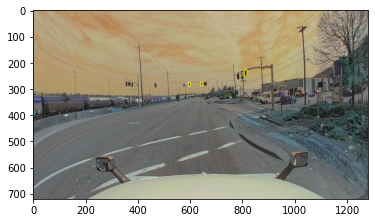

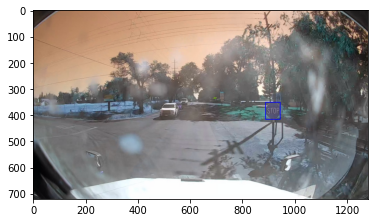

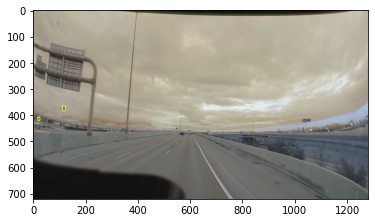

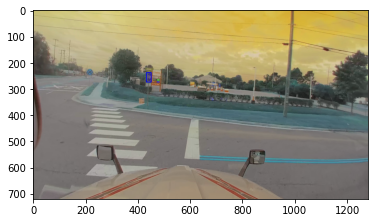

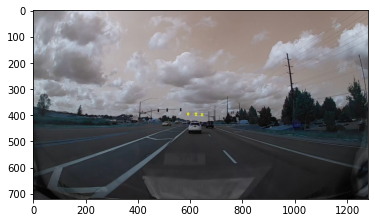

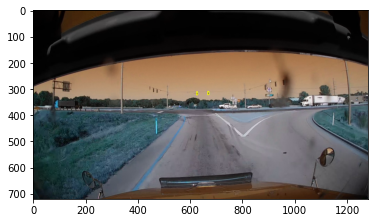

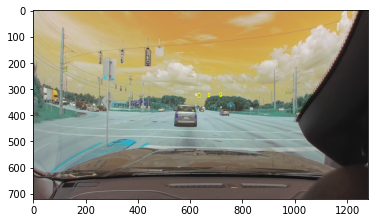

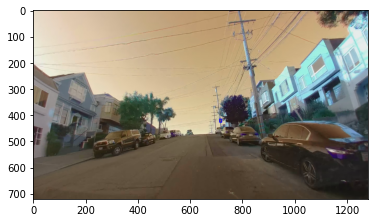

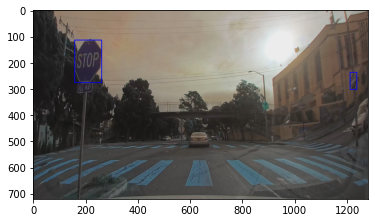

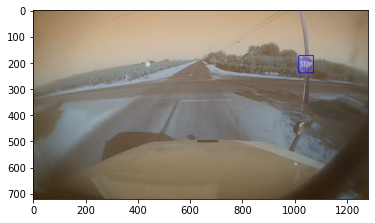

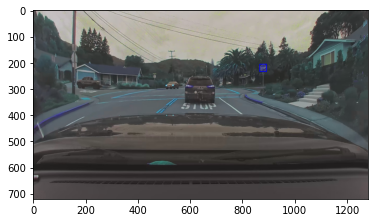

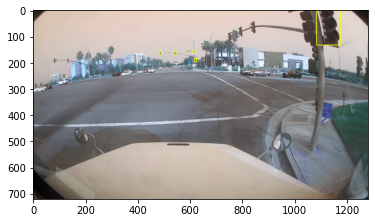

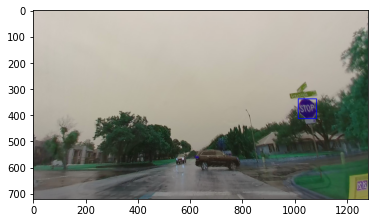

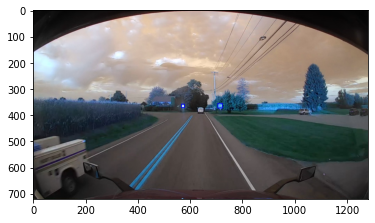

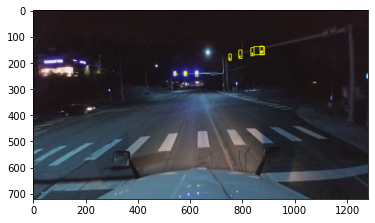

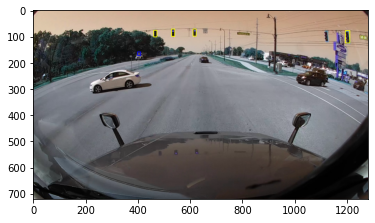

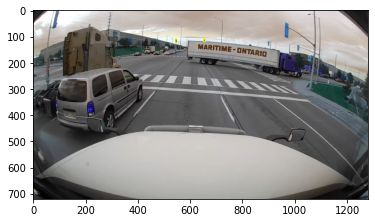

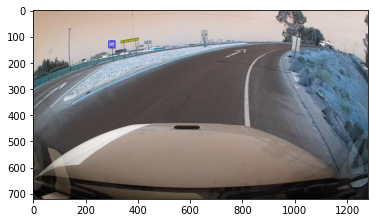

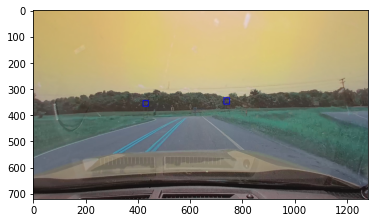

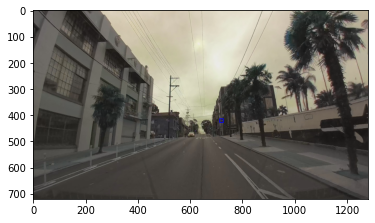

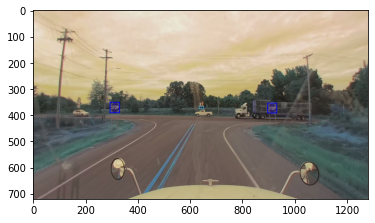

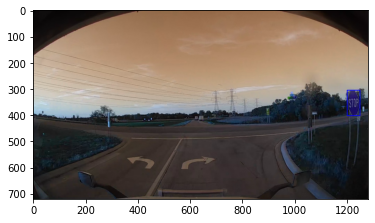

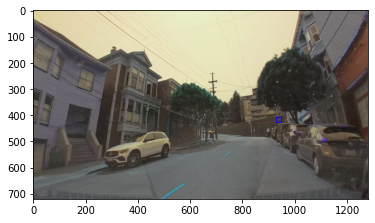

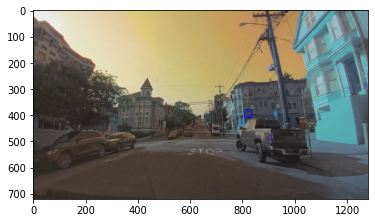

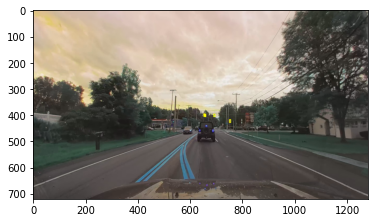

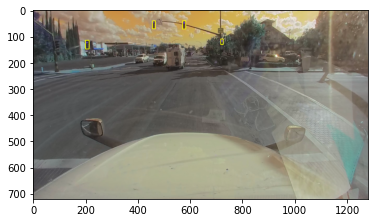

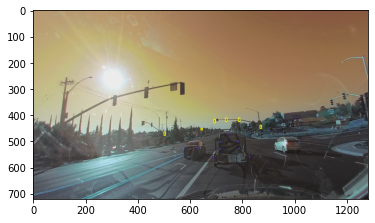

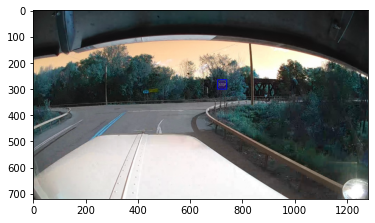

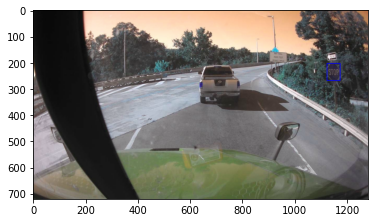

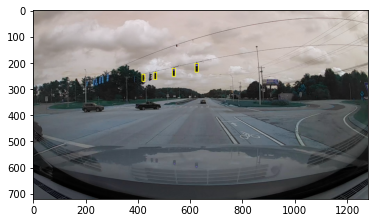

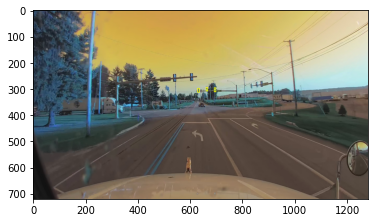

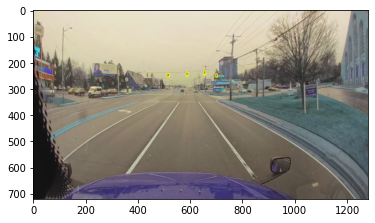

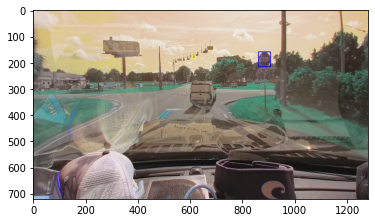

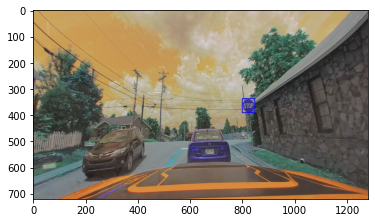

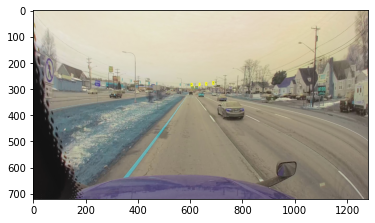

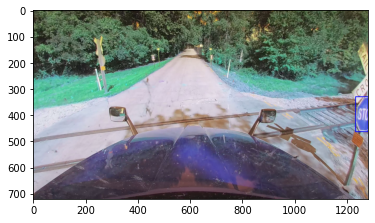

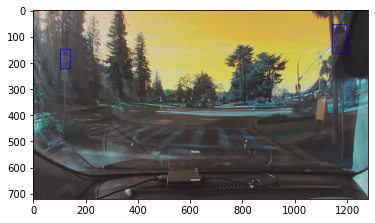

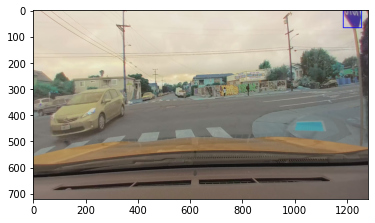

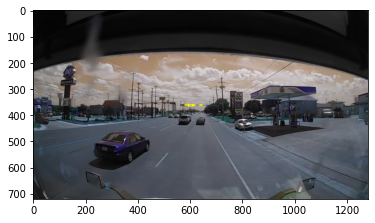

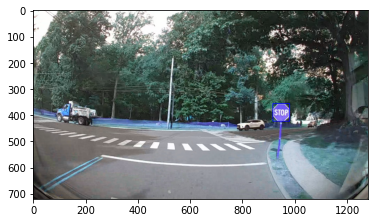

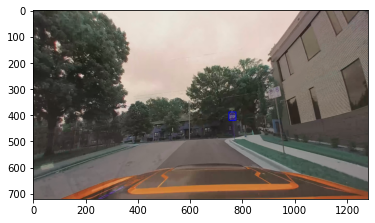

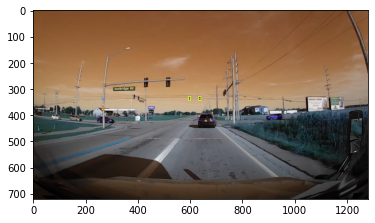

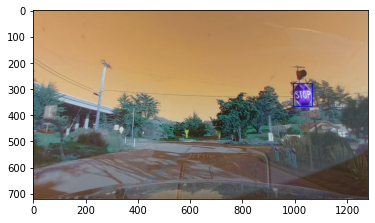

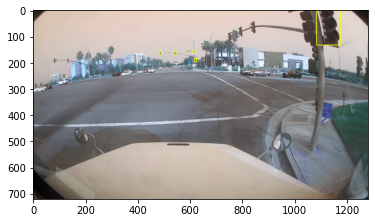

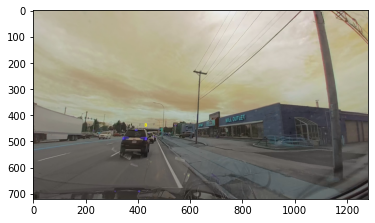

In [55]:
Images_base_path = "D:\\LUMS_RA\\Motive_AI_Challenge\\train\\traffic_lights\\images\\val\\val"
images = 50

image_dict = np.random.choice(data['images'],images)

image_names = [dic['file_name'] for dic in image_dict]
image_paths = [os.path.join(Images_base_path,name) for name in image_names]
image_ids = [dic['id'] for dic in image_dict]

id_path_dict = dict(zip(image_ids, image_paths))
annots_dict_list = data['annotations']
           
for i in range(images):
    key = (image_ids[i])
    image_path = id_path_dict[key]
    if os.path.isfile(image_path):
        img = cv2.imread(image_path)
    else:
        print ("The file " + image_path + " does not exist.")
    cat_bbox_list = [(annot_dict['category_id'],annot_dict['bbox']) for annot_dict in annots_dict_list if (annot_dict['image_id']==key)]
    img = annotate_image(img, cat_bbox_list)
    plt.imshow(img)
    plt.show()

### Visualize small labels

In [567]:
from pycocotools.coco import COCO
import matplotlib.pyplot as plt
import cv2
import os

In [597]:
# Opening JSON file
json_path = "D:\\LUMS_RA\\Motive_AI_Challenge\\train\\traffic_lights\\labels_TL.json"
Imgs_path = "D:\\LUMS_RA\\Motive_AI_Challenge\\train\\traffic_lights\\images"
class_info_dict= {
    1: [(255,0,0), 'Car'],#Red
    2: [(0,255,0), 'Truck'],#Green
    3: [(0,0,255), 'StopSign'],#Blue
    4: [(255,255,0), 'TrafficLight'],#Yellow
}

coco = COCO(json_path)
anns = coco.loadAnns(coco.getAnnIds())
size_limit = 3 #pixels

small_anns = [ann for ann in anns if (ann['bbox'][2] <= size_limit) or (ann['bbox'][3] <= size_limit)]
unique_imgs = set([ann['image_id'] for ann in small_anns])
print(len(small_anns))
'''
for img_id in unique_imgs:
    img_name = coco.loadImgs(img_id)[0]['file_name']
    img_path = os.path.join(Imgs_path,img_name)
    img = cv2.imread(img_path)
    cat_bbox_list = [(ann['category_id'],ann['bbox']) for ann in small_anns if (ann['image_id']==img_id)]
    img = annotate_image(img, cat_bbox_list)
    plt.imshow(img)
    plt.show()'''

loading annotations into memory...
Done (t=0.07s)
creating index...
index created!
756


"\nfor img_id in unique_imgs:\n    img_name = coco.loadImgs(img_id)[0]['file_name']\n    img_path = os.path.join(Imgs_path,img_name)\n    img = cv2.imread(img_path)\n    cat_bbox_list = [(ann['category_id'],ann['bbox']) for ann in small_anns if (ann['image_id']==img_id)]\n    img = annotate_image(img, cat_bbox_list)\n    plt.imshow(img)\n    plt.show()"

In [592]:
print(len(anns))

9842


### Delete wrong image labels

In [595]:
import json

In [600]:
new_path = "D:\\LUMS_RA\\Motive_AI_Challenge\\train\\traffic_lights\\labels_TL_refined.json"

images = coco.loadImgs(coco.getImgIds())
categs = coco.loadCats(coco.getCatIds())
annots = [ann for ann in coco.loadAnns(coco.getAnnIds()) if ann not in small_anns]

print("Writing {} Annots".format(len(annots)))
wirte_dict = {'images':images,'annotations':annots,'categories':categs}
json_object = json.dumps(wirte_dict)
f = open(new_path,'w')
f.write(json_object)
f.close()

Writing 9086 Annots


## Find IOU Score

In [69]:
def get_iou(bb1, bb2):
    """
    Calculate the Intersection over Union (IoU) of two bounding boxes.

    Parameters
    ----------
    bb1 : dict
        Keys: {'x1', 'x2', 'y1', 'y2'}
        The (x1, y1) position is at the top left corner,
        the (x2, y2) position is at the bottom right corner
    bb2 : dict
        Keys: {'x1', 'x2', 'y1', 'y2'}
        The (x, y) position is at the top left corner,
        the (x2, y2) position is at the bottom right corner

    Returns
    -------
    float
        in [0, 1]
    """
    assert bb1['x1'] < bb1['x2']
    assert bb1['y1'] < bb1['y2']
    assert bb2['x1'] < bb2['x2']
    assert bb2['y1'] < bb2['y2']

    # determine the coordinates of the intersection rectangle
    x_left = max(bb1['x1'], bb2['x1'])
    y_top = max(bb1['y1'], bb2['y1'])
    x_right = min(bb1['x2'], bb2['x2'])
    y_bottom = min(bb1['y2'], bb2['y2'])

    if x_right < x_left or y_bottom < y_top:
        return 0.0

    # The intersection of two axis-aligned bounding boxes is always an
    # axis-aligned bounding box
    intersection_area = (x_right - x_left + 1) * (y_bottom - y_top + 1)

    # compute the area of both AABBs
    bb1_area = (bb1['x2'] - bb1['x1'] + 1) * (bb1['y2'] - bb1['y1'] + 1)
    bb2_area = (bb2['x2'] - bb2['x1'] + 1) * (bb2['y2'] - bb2['y1'] + 1)

    # compute the intersection over union by taking the intersection
    # area and dividing it by the sum of prediction + ground-truth
    # areas - the interesection area
    iou = intersection_area / float(bb1_area + bb2_area - intersection_area)
    assert iou >= 0.0
    assert iou <= 1.0
    return iou

## Delete Certain Classes from JSON

In [106]:
from pycocotools.coco import COCO
import json

In [99]:
json_path = "D:\\LUMS_RA\\Motive_AI_Challenge\\Private_Test\\TrafficLights_PrivateTest.json"
out_path = "D:\\LUMS_RA\\Motive_AI_Challenge\\Private_Test\\TrafficLights_PrivateTest_2.json"
f = open(json_path)
data = json.load(f)
f.close()

classes2del = [1,2,3]
score_filt = 0

print("Number of annots before deletion: {}".format(len(data['annotations'])))
#updated_annots = np.copy(data['annotations']).tolist()
num_removed = 0

anns = [ann for ann in data['annotations'] if ann['category_id'] not in classes2del]
if score_filt > 0:
    anns = [ann for ann in anns if ann['confidence'] > score_filt]
    
'''for j,annotation in enumerate(data['annotations']):
    if (annotation['category_id'] in classes2del):
        (updated_annots.pop(j-num_removed))
        num_removed = num_removed + 1
    elif score_filt > 0:
        if annotation['confidence'] < score_filt:
            (updated_annots.pop(j-num_removed))
            num_removed = num_removed + 1'''
        
print("Removed: {}, # of annots after deletion: {}".format(len(data['annotations'])-len(anns),len(anns)))

print("Categories before deletion: {}".format(len(data['categories'])))
updated_cats = np.copy(data['categories']).tolist()
num_removed = 0
for j,category in enumerate(data['categories']):
    #print(category['id'])
    if category['id'] in classes2del:
        #print(j)
        (updated_cats.pop(j-num_removed))
        num_removed = num_removed + 1
print("Removed: {}, # of classes after deletion: {}".format(num_removed,len(updated_cats)))

wirte_dict = {'images':data['images'],'annotations':anns,'categories':updated_cats}
json_object = json.dumps(wirte_dict)
f = open(out_path,'w')
f.write(json_object)
f.close()

Number of annots before deletion: 6887
Removed: 0, # of annots after deletion: 6887
Categories before deletion: 4
Removed: 3, # of classes after deletion: 1


In [513]:
f.close()

In [189]:
#Confirm deletion and saving

json_path = out_path
coco=COCO(json_path)
cats = coco.loadCats(coco.getCatIds())
nms=[cat['name'] for cat in cats]
print('COCO categories: \n{}'.format(' '.join(nms)))

#Load images with category ID 3
Images = coco.getImgIds(catIds=[3])
print(len(Images))

loading annotations into memory...
Done (t=0.13s)
creating index...
index created!
COCO categories: 
Car Truck traffic_lights
0


## Download COCO data

In [ ]:
import pycocotools
from pycocotools.coco import COCO
import json

In [73]:
!wget http://images.cocodataset.org/annotations/annotations_trainval2017.zip

^C


In [61]:
categories = {
    1: 'Car',#Red
    2: 'Truck',#Green
    3: 'StopSign',#Blue
    4: 'TrafficLight',#Yellow
}
coco_json = "D:\\LUMS_RA\\Motive_AI_Challenge\\train\\instances_train2017.json"
coco=COCO(coco_json)
img_ids = set(coco.getImgIds(catIds=[13]))
print(len(img_ids))
img_ids |= set(coco.getImgIds(catIds=[10]))
img_ids = list(img_ids)
print("Total Images: {}, Images for category {}: {}".format(len(coco.getImgIds()),[categories[3],categories[4]],len(img_ids)))

loading annotations into memory...
Done (t=32.47s)
creating index...
index created!
1734
Total Images: 118287, Images for category ['StopSign', 'TrafficLight']: 5705


In [82]:
coco.download(tarDir="D:\\LUMS_RA\\Motive_AI_Challenge\\train\\train_images_StopSign_TrafficLights", imgIds=img_ids)

downloaded 0/5705 images (t=1.3s)
downloaded 1/5705 images (t=1.2s)
downloaded 2/5705 images (t=1.2s)
downloaded 3/5705 images (t=1.3s)
downloaded 4/5705 images (t=1.3s)
downloaded 5/5705 images (t=1.1s)
downloaded 6/5705 images (t=1.6s)
downloaded 7/5705 images (t=1.3s)
downloaded 8/5705 images (t=1.4s)
downloaded 9/5705 images (t=1.5s)
downloaded 10/5705 images (t=1.3s)
downloaded 11/5705 images (t=1.0s)
downloaded 12/5705 images (t=1.6s)
downloaded 13/5705 images (t=1.5s)
downloaded 14/5705 images (t=1.4s)
downloaded 15/5705 images (t=1.4s)
downloaded 16/5705 images (t=1.5s)
downloaded 17/5705 images (t=0.8s)
downloaded 18/5705 images (t=1.5s)
downloaded 19/5705 images (t=1.4s)
downloaded 20/5705 images (t=1.8s)
downloaded 21/5705 images (t=1.5s)
downloaded 22/5705 images (t=1.7s)
downloaded 23/5705 images (t=1.3s)
downloaded 24/5705 images (t=0.9s)
downloaded 25/5705 images (t=1.4s)
downloaded 26/5705 images (t=1.5s)
downloaded 27/5705 images (t=1.4s)
downloaded 28/5705 images (t=1

downloaded 231/5705 images (t=1.2s)
downloaded 232/5705 images (t=1.3s)
downloaded 233/5705 images (t=1.2s)
downloaded 234/5705 images (t=1.2s)
downloaded 235/5705 images (t=0.8s)
downloaded 236/5705 images (t=1.7s)
downloaded 237/5705 images (t=1.2s)
downloaded 238/5705 images (t=1.2s)
downloaded 239/5705 images (t=1.2s)
downloaded 240/5705 images (t=2.9s)
downloaded 241/5705 images (t=1.2s)
downloaded 242/5705 images (t=1.2s)
downloaded 243/5705 images (t=1.4s)
downloaded 244/5705 images (t=1.2s)
downloaded 245/5705 images (t=1.2s)
downloaded 246/5705 images (t=1.2s)
downloaded 247/5705 images (t=2.1s)
downloaded 248/5705 images (t=1.0s)
downloaded 249/5705 images (t=1.1s)
downloaded 250/5705 images (t=1.4s)
downloaded 251/5705 images (t=1.2s)
downloaded 252/5705 images (t=1.4s)
downloaded 253/5705 images (t=1.2s)
downloaded 254/5705 images (t=1.4s)
downloaded 255/5705 images (t=1.3s)
downloaded 256/5705 images (t=1.2s)
downloaded 257/5705 images (t=1.2s)
downloaded 258/5705 images (

downloaded 459/5705 images (t=1.4s)
downloaded 460/5705 images (t=1.2s)
downloaded 461/5705 images (t=1.6s)
downloaded 462/5705 images (t=1.0s)
downloaded 463/5705 images (t=1.2s)
downloaded 464/5705 images (t=1.2s)
downloaded 465/5705 images (t=1.1s)
downloaded 466/5705 images (t=1.4s)
downloaded 467/5705 images (t=1.2s)
downloaded 468/5705 images (t=1.2s)
downloaded 469/5705 images (t=0.9s)
downloaded 470/5705 images (t=1.0s)
downloaded 471/5705 images (t=1.6s)
downloaded 472/5705 images (t=1.4s)
downloaded 473/5705 images (t=1.4s)
downloaded 474/5705 images (t=1.1s)
downloaded 475/5705 images (t=1.4s)
downloaded 476/5705 images (t=1.4s)
downloaded 477/5705 images (t=1.5s)
downloaded 478/5705 images (t=1.2s)
downloaded 479/5705 images (t=1.1s)
downloaded 480/5705 images (t=1.0s)
downloaded 481/5705 images (t=1.3s)
downloaded 482/5705 images (t=1.4s)
downloaded 483/5705 images (t=1.2s)
downloaded 484/5705 images (t=1.4s)
downloaded 485/5705 images (t=1.2s)
downloaded 486/5705 images (

downloaded 687/5705 images (t=1.1s)
downloaded 688/5705 images (t=1.4s)
downloaded 689/5705 images (t=1.2s)
downloaded 690/5705 images (t=1.3s)
downloaded 691/5705 images (t=1.6s)
downloaded 692/5705 images (t=1.3s)
downloaded 693/5705 images (t=1.2s)
downloaded 694/5705 images (t=1.5s)
downloaded 695/5705 images (t=1.5s)
downloaded 696/5705 images (t=1.4s)
downloaded 697/5705 images (t=2.8s)
downloaded 698/5705 images (t=1.6s)
downloaded 699/5705 images (t=1.4s)
downloaded 700/5705 images (t=1.2s)
downloaded 701/5705 images (t=1.2s)
downloaded 702/5705 images (t=1.3s)
downloaded 703/5705 images (t=1.4s)
downloaded 704/5705 images (t=1.2s)
downloaded 705/5705 images (t=1.3s)
downloaded 706/5705 images (t=1.6s)
downloaded 707/5705 images (t=1.2s)
downloaded 708/5705 images (t=1.2s)
downloaded 709/5705 images (t=1.9s)
downloaded 710/5705 images (t=1.3s)
downloaded 711/5705 images (t=1.4s)
downloaded 712/5705 images (t=1.2s)
downloaded 713/5705 images (t=1.2s)
downloaded 714/5705 images (

downloaded 915/5705 images (t=1.2s)
downloaded 916/5705 images (t=1.2s)
downloaded 917/5705 images (t=1.3s)
downloaded 918/5705 images (t=1.2s)
downloaded 919/5705 images (t=1.3s)
downloaded 920/5705 images (t=1.4s)
downloaded 921/5705 images (t=1.7s)
downloaded 922/5705 images (t=5.3s)
downloaded 923/5705 images (t=1.3s)
downloaded 924/5705 images (t=1.2s)
downloaded 925/5705 images (t=3.3s)
downloaded 926/5705 images (t=1.5s)
downloaded 927/5705 images (t=1.2s)
downloaded 928/5705 images (t=1.1s)
downloaded 929/5705 images (t=1.6s)
downloaded 930/5705 images (t=1.2s)
downloaded 931/5705 images (t=1.9s)
downloaded 932/5705 images (t=3.6s)
downloaded 933/5705 images (t=1.3s)
downloaded 934/5705 images (t=1.4s)
downloaded 935/5705 images (t=1.2s)
downloaded 936/5705 images (t=1.2s)
downloaded 937/5705 images (t=1.3s)
downloaded 938/5705 images (t=1.2s)
downloaded 939/5705 images (t=1.0s)
downloaded 940/5705 images (t=7.5s)
downloaded 941/5705 images (t=1.4s)
downloaded 942/5705 images (

downloaded 1139/5705 images (t=1.2s)
downloaded 1140/5705 images (t=1.3s)
downloaded 1141/5705 images (t=1.2s)
downloaded 1142/5705 images (t=1.2s)
downloaded 1143/5705 images (t=1.1s)
downloaded 1144/5705 images (t=1.4s)
downloaded 1145/5705 images (t=1.4s)
downloaded 1146/5705 images (t=1.2s)
downloaded 1147/5705 images (t=1.2s)
downloaded 1148/5705 images (t=1.4s)
downloaded 1149/5705 images (t=1.4s)
downloaded 1150/5705 images (t=1.4s)
downloaded 1151/5705 images (t=1.4s)
downloaded 1152/5705 images (t=0.9s)
downloaded 1153/5705 images (t=1.4s)
downloaded 1154/5705 images (t=1.4s)
downloaded 1155/5705 images (t=1.4s)
downloaded 1156/5705 images (t=1.4s)
downloaded 1157/5705 images (t=1.2s)
downloaded 1158/5705 images (t=1.5s)
downloaded 1159/5705 images (t=1.2s)
downloaded 1160/5705 images (t=1.2s)
downloaded 1161/5705 images (t=1.3s)
downloaded 1162/5705 images (t=1.4s)
downloaded 1163/5705 images (t=1.5s)
downloaded 1164/5705 images (t=1.2s)
downloaded 1165/5705 images (t=1.2s)
d

downloaded 1361/5705 images (t=1.3s)
downloaded 1362/5705 images (t=1.3s)
downloaded 1363/5705 images (t=1.0s)
downloaded 1364/5705 images (t=1.4s)
downloaded 1365/5705 images (t=1.4s)
downloaded 1366/5705 images (t=1.2s)
downloaded 1367/5705 images (t=1.2s)
downloaded 1368/5705 images (t=1.4s)
downloaded 1369/5705 images (t=1.4s)
downloaded 1370/5705 images (t=1.2s)
downloaded 1371/5705 images (t=1.2s)
downloaded 1372/5705 images (t=1.4s)
downloaded 1373/5705 images (t=1.4s)
downloaded 1374/5705 images (t=1.2s)
downloaded 1375/5705 images (t=1.0s)
downloaded 1376/5705 images (t=1.2s)
downloaded 1377/5705 images (t=1.5s)
downloaded 1378/5705 images (t=1.1s)
downloaded 1379/5705 images (t=1.2s)
downloaded 1380/5705 images (t=1.4s)
downloaded 1381/5705 images (t=1.6s)
downloaded 1382/5705 images (t=1.8s)
downloaded 1383/5705 images (t=1.2s)
downloaded 1384/5705 images (t=1.5s)
downloaded 1385/5705 images (t=1.3s)
downloaded 1386/5705 images (t=1.2s)
downloaded 1387/5705 images (t=1.4s)
d

downloaded 1583/5705 images (t=1.4s)
downloaded 1584/5705 images (t=1.0s)
downloaded 1585/5705 images (t=1.2s)
downloaded 1586/5705 images (t=1.2s)
downloaded 1587/5705 images (t=1.2s)
downloaded 1588/5705 images (t=1.3s)
downloaded 1589/5705 images (t=1.2s)
downloaded 1590/5705 images (t=1.1s)
downloaded 1591/5705 images (t=1.4s)
downloaded 1592/5705 images (t=1.4s)
downloaded 1593/5705 images (t=1.2s)
downloaded 1594/5705 images (t=1.4s)
downloaded 1595/5705 images (t=1.2s)
downloaded 1596/5705 images (t=1.3s)
downloaded 1597/5705 images (t=1.2s)
downloaded 1598/5705 images (t=1.2s)
downloaded 1599/5705 images (t=1.2s)
downloaded 1600/5705 images (t=1.3s)
downloaded 1601/5705 images (t=1.4s)
downloaded 1602/5705 images (t=1.2s)
downloaded 1603/5705 images (t=1.4s)
downloaded 1604/5705 images (t=1.3s)
downloaded 1605/5705 images (t=1.4s)
downloaded 1606/5705 images (t=0.8s)
downloaded 1607/5705 images (t=1.2s)
downloaded 1608/5705 images (t=1.3s)
downloaded 1609/5705 images (t=1.3s)
d

downloaded 1805/5705 images (t=1.6s)
downloaded 1806/5705 images (t=1.2s)
downloaded 1807/5705 images (t=1.0s)
downloaded 1808/5705 images (t=1.6s)
downloaded 1809/5705 images (t=1.3s)
downloaded 1810/5705 images (t=1.2s)
downloaded 1811/5705 images (t=1.2s)
downloaded 1812/5705 images (t=1.1s)
downloaded 1813/5705 images (t=1.2s)
downloaded 1814/5705 images (t=1.2s)
downloaded 1815/5705 images (t=1.2s)
downloaded 1816/5705 images (t=1.4s)
downloaded 1817/5705 images (t=1.2s)
downloaded 1818/5705 images (t=1.2s)
downloaded 1819/5705 images (t=1.6s)
downloaded 1820/5705 images (t=1.2s)
downloaded 1821/5705 images (t=1.2s)
downloaded 1822/5705 images (t=1.3s)
downloaded 1823/5705 images (t=1.7s)
downloaded 1824/5705 images (t=1.3s)
downloaded 1825/5705 images (t=1.4s)
downloaded 1826/5705 images (t=2.1s)
downloaded 1827/5705 images (t=1.4s)
downloaded 1828/5705 images (t=1.1s)
downloaded 1829/5705 images (t=1.9s)
downloaded 1830/5705 images (t=1.1s)
downloaded 1831/5705 images (t=1.5s)
d

downloaded 2027/5705 images (t=1.2s)
downloaded 2028/5705 images (t=1.2s)
downloaded 2029/5705 images (t=1.2s)
downloaded 2030/5705 images (t=1.3s)
downloaded 2031/5705 images (t=1.2s)
downloaded 2032/5705 images (t=1.2s)
downloaded 2033/5705 images (t=1.0s)
downloaded 2034/5705 images (t=1.2s)
downloaded 2035/5705 images (t=1.6s)
downloaded 2036/5705 images (t=1.4s)
downloaded 2037/5705 images (t=1.2s)
downloaded 2038/5705 images (t=1.2s)
downloaded 2039/5705 images (t=1.3s)
downloaded 2040/5705 images (t=1.2s)
downloaded 2041/5705 images (t=1.4s)
downloaded 2042/5705 images (t=1.2s)
downloaded 2043/5705 images (t=1.2s)
downloaded 2044/5705 images (t=1.0s)
downloaded 2045/5705 images (t=1.6s)
downloaded 2046/5705 images (t=1.0s)
downloaded 2047/5705 images (t=1.2s)
downloaded 2048/5705 images (t=7.9s)
downloaded 2049/5705 images (t=1.8s)
downloaded 2050/5705 images (t=1.2s)
downloaded 2051/5705 images (t=1.4s)
downloaded 2052/5705 images (t=1.3s)
downloaded 2053/5705 images (t=1.4s)
d

downloaded 2249/5705 images (t=0.9s)
downloaded 2250/5705 images (t=1.4s)
downloaded 2251/5705 images (t=0.9s)
downloaded 2252/5705 images (t=1.2s)
downloaded 2253/5705 images (t=1.4s)
downloaded 2254/5705 images (t=1.0s)
downloaded 2255/5705 images (t=1.2s)
downloaded 2256/5705 images (t=1.4s)
downloaded 2257/5705 images (t=1.2s)
downloaded 2258/5705 images (t=2.1s)
downloaded 2259/5705 images (t=1.4s)
downloaded 2260/5705 images (t=1.4s)
downloaded 2261/5705 images (t=1.2s)
downloaded 2262/5705 images (t=1.4s)
downloaded 2263/5705 images (t=1.4s)
downloaded 2264/5705 images (t=1.2s)
downloaded 2265/5705 images (t=1.2s)
downloaded 2266/5705 images (t=1.0s)
downloaded 2267/5705 images (t=1.3s)
downloaded 2268/5705 images (t=1.2s)
downloaded 2269/5705 images (t=1.2s)
downloaded 2270/5705 images (t=1.2s)
downloaded 2271/5705 images (t=1.4s)
downloaded 2272/5705 images (t=0.8s)
downloaded 2273/5705 images (t=1.4s)
downloaded 2274/5705 images (t=1.4s)
downloaded 2275/5705 images (t=1.4s)
d

downloaded 2471/5705 images (t=1.3s)
downloaded 2472/5705 images (t=1.4s)
downloaded 2473/5705 images (t=1.2s)
downloaded 2474/5705 images (t=1.4s)
downloaded 2475/5705 images (t=1.2s)
downloaded 2476/5705 images (t=1.2s)
downloaded 2477/5705 images (t=0.9s)
downloaded 2478/5705 images (t=1.2s)
downloaded 2479/5705 images (t=1.4s)
downloaded 2480/5705 images (t=1.0s)
downloaded 2481/5705 images (t=1.2s)
downloaded 2482/5705 images (t=1.2s)
downloaded 2483/5705 images (t=1.2s)
downloaded 2484/5705 images (t=1.3s)
downloaded 2485/5705 images (t=1.0s)
downloaded 2486/5705 images (t=0.8s)
downloaded 2487/5705 images (t=1.2s)
downloaded 2488/5705 images (t=1.2s)
downloaded 2489/5705 images (t=1.6s)
downloaded 2490/5705 images (t=1.2s)
downloaded 2491/5705 images (t=1.4s)
downloaded 2492/5705 images (t=1.3s)
downloaded 2493/5705 images (t=1.0s)
downloaded 2494/5705 images (t=1.2s)
downloaded 2495/5705 images (t=1.3s)
downloaded 2496/5705 images (t=1.5s)
downloaded 2497/5705 images (t=1.1s)
d

downloaded 2693/5705 images (t=1.6s)
downloaded 2694/5705 images (t=1.2s)
downloaded 2695/5705 images (t=1.4s)
downloaded 2696/5705 images (t=1.5s)
downloaded 2697/5705 images (t=1.4s)
downloaded 2698/5705 images (t=1.2s)
downloaded 2699/5705 images (t=1.2s)
downloaded 2700/5705 images (t=1.6s)
downloaded 2701/5705 images (t=1.2s)
downloaded 2702/5705 images (t=1.0s)
downloaded 2703/5705 images (t=1.0s)
downloaded 2704/5705 images (t=1.0s)
downloaded 2705/5705 images (t=1.4s)
downloaded 2706/5705 images (t=1.3s)
downloaded 2707/5705 images (t=1.2s)
downloaded 2708/5705 images (t=1.2s)
downloaded 2709/5705 images (t=1.6s)
downloaded 2710/5705 images (t=1.1s)
downloaded 2711/5705 images (t=1.4s)
downloaded 2712/5705 images (t=1.2s)
downloaded 2713/5705 images (t=1.3s)
downloaded 2714/5705 images (t=1.4s)
downloaded 2715/5705 images (t=1.2s)
downloaded 2716/5705 images (t=0.9s)
downloaded 2717/5705 images (t=1.0s)
downloaded 2718/5705 images (t=1.6s)
downloaded 2719/5705 images (t=1.0s)
d

downloaded 2915/5705 images (t=1.4s)
downloaded 2916/5705 images (t=1.2s)
downloaded 2917/5705 images (t=1.2s)
downloaded 2918/5705 images (t=1.4s)
downloaded 2919/5705 images (t=1.3s)
downloaded 2920/5705 images (t=1.2s)
downloaded 2921/5705 images (t=1.2s)
downloaded 2922/5705 images (t=1.2s)
downloaded 2923/5705 images (t=1.2s)
downloaded 2924/5705 images (t=1.2s)
downloaded 2925/5705 images (t=1.2s)
downloaded 2926/5705 images (t=1.2s)
downloaded 2927/5705 images (t=1.4s)
downloaded 2928/5705 images (t=1.4s)
downloaded 2929/5705 images (t=1.2s)
downloaded 2930/5705 images (t=1.2s)
downloaded 2931/5705 images (t=1.3s)
downloaded 2932/5705 images (t=1.6s)
downloaded 2933/5705 images (t=1.2s)
downloaded 2934/5705 images (t=1.2s)
downloaded 2935/5705 images (t=1.5s)
downloaded 2936/5705 images (t=1.1s)
downloaded 2937/5705 images (t=1.3s)
downloaded 2938/5705 images (t=2.4s)
downloaded 2939/5705 images (t=1.2s)
downloaded 2940/5705 images (t=1.2s)
downloaded 2941/5705 images (t=1.3s)
d

downloaded 3137/5705 images (t=1.4s)
downloaded 3138/5705 images (t=0.9s)
downloaded 3139/5705 images (t=1.2s)
downloaded 3140/5705 images (t=1.4s)
downloaded 3141/5705 images (t=1.4s)
downloaded 3142/5705 images (t=1.2s)
downloaded 3143/5705 images (t=1.2s)
downloaded 3144/5705 images (t=1.2s)
downloaded 3145/5705 images (t=1.4s)
downloaded 3146/5705 images (t=1.1s)
downloaded 3147/5705 images (t=1.4s)
downloaded 3148/5705 images (t=1.4s)
downloaded 3149/5705 images (t=1.2s)
downloaded 3150/5705 images (t=1.4s)
downloaded 3151/5705 images (t=1.2s)
downloaded 3152/5705 images (t=1.3s)
downloaded 3153/5705 images (t=1.3s)
downloaded 3154/5705 images (t=4.7s)
downloaded 3155/5705 images (t=1.4s)
downloaded 3156/5705 images (t=1.0s)
downloaded 3157/5705 images (t=1.3s)
downloaded 3158/5705 images (t=1.1s)
downloaded 3159/5705 images (t=1.2s)
downloaded 3160/5705 images (t=1.0s)
downloaded 3161/5705 images (t=1.5s)
downloaded 3162/5705 images (t=1.2s)
downloaded 3163/5705 images (t=1.3s)
d

downloaded 3359/5705 images (t=1.4s)
downloaded 3360/5705 images (t=1.4s)
downloaded 3361/5705 images (t=1.2s)
downloaded 3362/5705 images (t=1.0s)
downloaded 3363/5705 images (t=1.4s)
downloaded 3364/5705 images (t=1.2s)
downloaded 3365/5705 images (t=1.2s)
downloaded 3366/5705 images (t=1.5s)
downloaded 3367/5705 images (t=1.6s)
downloaded 3368/5705 images (t=1.3s)
downloaded 3369/5705 images (t=1.4s)
downloaded 3370/5705 images (t=1.4s)
downloaded 3371/5705 images (t=1.2s)
downloaded 3372/5705 images (t=1.1s)
downloaded 3373/5705 images (t=1.4s)
downloaded 3374/5705 images (t=1.4s)
downloaded 3375/5705 images (t=1.6s)
downloaded 3376/5705 images (t=1.4s)
downloaded 3377/5705 images (t=1.5s)
downloaded 3378/5705 images (t=1.2s)
downloaded 3379/5705 images (t=1.3s)
downloaded 3380/5705 images (t=1.2s)
downloaded 3381/5705 images (t=1.2s)
downloaded 3382/5705 images (t=1.2s)
downloaded 3383/5705 images (t=1.3s)
downloaded 3384/5705 images (t=1.6s)
downloaded 3385/5705 images (t=1.2s)
d

downloaded 3581/5705 images (t=1.2s)
downloaded 3582/5705 images (t=1.2s)
downloaded 3583/5705 images (t=1.2s)
downloaded 3584/5705 images (t=1.5s)
downloaded 3585/5705 images (t=1.6s)
downloaded 3586/5705 images (t=1.3s)
downloaded 3587/5705 images (t=1.4s)
downloaded 3588/5705 images (t=1.2s)
downloaded 3589/5705 images (t=1.6s)
downloaded 3590/5705 images (t=1.2s)
downloaded 3591/5705 images (t=1.0s)
downloaded 3592/5705 images (t=1.2s)
downloaded 3593/5705 images (t=1.2s)
downloaded 3594/5705 images (t=1.3s)
downloaded 3595/5705 images (t=1.2s)
downloaded 3596/5705 images (t=1.4s)
downloaded 3597/5705 images (t=1.2s)
downloaded 3598/5705 images (t=1.4s)
downloaded 3599/5705 images (t=1.4s)
downloaded 3600/5705 images (t=1.2s)
downloaded 3601/5705 images (t=1.4s)
downloaded 3602/5705 images (t=1.4s)
downloaded 3603/5705 images (t=1.2s)
downloaded 3604/5705 images (t=1.0s)
downloaded 3605/5705 images (t=1.2s)
downloaded 3606/5705 images (t=1.2s)
downloaded 3607/5705 images (t=1.2s)
d

downloaded 3803/5705 images (t=1.4s)
downloaded 3804/5705 images (t=1.2s)
downloaded 3805/5705 images (t=1.2s)
downloaded 3806/5705 images (t=1.4s)
downloaded 3807/5705 images (t=1.4s)
downloaded 3808/5705 images (t=1.2s)
downloaded 3809/5705 images (t=1.2s)
downloaded 3810/5705 images (t=1.2s)
downloaded 3811/5705 images (t=1.3s)
downloaded 3812/5705 images (t=1.2s)
downloaded 3813/5705 images (t=1.1s)
downloaded 3814/5705 images (t=1.4s)
downloaded 3815/5705 images (t=1.6s)
downloaded 3816/5705 images (t=1.3s)
downloaded 3817/5705 images (t=1.3s)
downloaded 3818/5705 images (t=1.2s)
downloaded 3819/5705 images (t=1.7s)
downloaded 3820/5705 images (t=1.4s)
downloaded 3821/5705 images (t=1.2s)
downloaded 3822/5705 images (t=1.2s)
downloaded 3823/5705 images (t=1.4s)
downloaded 3824/5705 images (t=1.2s)
downloaded 3825/5705 images (t=1.2s)
downloaded 3826/5705 images (t=1.2s)
downloaded 3827/5705 images (t=1.3s)
downloaded 3828/5705 images (t=1.3s)
downloaded 3829/5705 images (t=1.2s)
d

downloaded 4025/5705 images (t=1.2s)
downloaded 4026/5705 images (t=1.2s)
downloaded 4027/5705 images (t=1.4s)
downloaded 4028/5705 images (t=1.4s)
downloaded 4029/5705 images (t=1.3s)
downloaded 4030/5705 images (t=1.2s)
downloaded 4031/5705 images (t=1.5s)
downloaded 4032/5705 images (t=1.3s)
downloaded 4033/5705 images (t=1.4s)
downloaded 4034/5705 images (t=1.1s)
downloaded 4035/5705 images (t=1.2s)
downloaded 4036/5705 images (t=1.2s)
downloaded 4037/5705 images (t=1.6s)
downloaded 4038/5705 images (t=1.2s)
downloaded 4039/5705 images (t=1.2s)
downloaded 4040/5705 images (t=1.4s)
downloaded 4041/5705 images (t=1.6s)
downloaded 4042/5705 images (t=1.0s)
downloaded 4043/5705 images (t=1.2s)
downloaded 4044/5705 images (t=1.2s)
downloaded 4045/5705 images (t=1.3s)
downloaded 4046/5705 images (t=1.2s)
downloaded 4047/5705 images (t=1.2s)
downloaded 4048/5705 images (t=1.0s)
downloaded 4049/5705 images (t=1.0s)
downloaded 4050/5705 images (t=1.3s)
downloaded 4051/5705 images (t=1.6s)
d

downloaded 4247/5705 images (t=1.4s)
downloaded 4248/5705 images (t=1.4s)
downloaded 4249/5705 images (t=1.2s)
downloaded 4250/5705 images (t=1.2s)
downloaded 4251/5705 images (t=1.2s)
downloaded 4252/5705 images (t=1.2s)
downloaded 4253/5705 images (t=1.4s)
downloaded 4254/5705 images (t=1.2s)
downloaded 4255/5705 images (t=1.0s)
downloaded 4256/5705 images (t=1.4s)
downloaded 4257/5705 images (t=1.2s)
downloaded 4258/5705 images (t=1.4s)
downloaded 4259/5705 images (t=1.5s)
downloaded 4260/5705 images (t=1.4s)
downloaded 4261/5705 images (t=1.2s)
downloaded 4262/5705 images (t=1.4s)
downloaded 4263/5705 images (t=2.6s)
downloaded 4264/5705 images (t=1.7s)
downloaded 4265/5705 images (t=1.2s)
downloaded 4266/5705 images (t=1.6s)
downloaded 4267/5705 images (t=1.3s)
downloaded 4268/5705 images (t=1.2s)
downloaded 4269/5705 images (t=1.0s)
downloaded 4270/5705 images (t=1.6s)
downloaded 4271/5705 images (t=1.2s)
downloaded 4272/5705 images (t=1.0s)
downloaded 4273/5705 images (t=1.4s)
d

downloaded 4469/5705 images (t=1.0s)
downloaded 4470/5705 images (t=1.2s)
downloaded 4471/5705 images (t=1.3s)
downloaded 4472/5705 images (t=1.2s)
downloaded 4473/5705 images (t=1.2s)
downloaded 4474/5705 images (t=1.2s)
downloaded 4475/5705 images (t=1.2s)
downloaded 4476/5705 images (t=1.2s)
downloaded 4477/5705 images (t=1.2s)
downloaded 4478/5705 images (t=1.4s)
downloaded 4479/5705 images (t=1.2s)
downloaded 4480/5705 images (t=1.4s)
downloaded 4481/5705 images (t=1.4s)
downloaded 4482/5705 images (t=1.4s)
downloaded 4483/5705 images (t=1.2s)
downloaded 4484/5705 images (t=1.2s)
downloaded 4485/5705 images (t=1.4s)
downloaded 4486/5705 images (t=1.3s)
downloaded 4487/5705 images (t=1.4s)
downloaded 4488/5705 images (t=1.2s)
downloaded 4489/5705 images (t=1.4s)
downloaded 4490/5705 images (t=1.4s)
downloaded 4491/5705 images (t=1.3s)
downloaded 4492/5705 images (t=1.1s)
downloaded 4493/5705 images (t=1.2s)
downloaded 4494/5705 images (t=1.4s)
downloaded 4495/5705 images (t=1.2s)
d

downloaded 4691/5705 images (t=1.6s)
downloaded 4692/5705 images (t=1.2s)
downloaded 4693/5705 images (t=1.2s)
downloaded 4694/5705 images (t=1.4s)
downloaded 4695/5705 images (t=1.2s)
downloaded 4696/5705 images (t=1.5s)
downloaded 4697/5705 images (t=1.2s)
downloaded 4698/5705 images (t=1.4s)
downloaded 4699/5705 images (t=1.2s)
downloaded 4700/5705 images (t=1.2s)
downloaded 4701/5705 images (t=1.6s)
downloaded 4702/5705 images (t=1.3s)
downloaded 4703/5705 images (t=1.2s)
downloaded 4704/5705 images (t=1.3s)
downloaded 4705/5705 images (t=1.4s)
downloaded 4706/5705 images (t=1.4s)
downloaded 4707/5705 images (t=1.2s)
downloaded 4708/5705 images (t=1.2s)
downloaded 4709/5705 images (t=1.4s)
downloaded 4710/5705 images (t=1.4s)
downloaded 4711/5705 images (t=1.2s)
downloaded 4712/5705 images (t=1.2s)
downloaded 4713/5705 images (t=1.1s)
downloaded 4714/5705 images (t=1.1s)
downloaded 4715/5705 images (t=1.5s)
downloaded 4716/5705 images (t=1.2s)
downloaded 4717/5705 images (t=1.0s)
d

downloaded 4913/5705 images (t=1.0s)
downloaded 4914/5705 images (t=1.3s)
downloaded 4915/5705 images (t=1.2s)
downloaded 4916/5705 images (t=1.1s)
downloaded 4917/5705 images (t=1.2s)
downloaded 4918/5705 images (t=1.4s)
downloaded 4919/5705 images (t=1.2s)
downloaded 4920/5705 images (t=1.2s)
downloaded 4921/5705 images (t=1.2s)
downloaded 4922/5705 images (t=1.2s)
downloaded 4923/5705 images (t=1.0s)
downloaded 4924/5705 images (t=1.2s)
downloaded 4925/5705 images (t=1.4s)
downloaded 4926/5705 images (t=1.6s)
downloaded 4927/5705 images (t=1.2s)
downloaded 4928/5705 images (t=1.2s)
downloaded 4929/5705 images (t=1.4s)
downloaded 4930/5705 images (t=1.3s)
downloaded 4931/5705 images (t=1.0s)
downloaded 4932/5705 images (t=1.5s)
downloaded 4933/5705 images (t=1.3s)
downloaded 4934/5705 images (t=1.4s)
downloaded 4935/5705 images (t=0.9s)
downloaded 4936/5705 images (t=1.5s)
downloaded 4937/5705 images (t=1.2s)
downloaded 4938/5705 images (t=1.2s)
downloaded 4939/5705 images (t=1.2s)
d

downloaded 5135/5705 images (t=1.2s)
downloaded 5136/5705 images (t=1.3s)
downloaded 5137/5705 images (t=1.0s)
downloaded 5138/5705 images (t=1.3s)
downloaded 5139/5705 images (t=1.4s)
downloaded 5140/5705 images (t=1.4s)
downloaded 5141/5705 images (t=1.2s)
downloaded 5142/5705 images (t=1.2s)
downloaded 5143/5705 images (t=1.5s)
downloaded 5144/5705 images (t=1.0s)
downloaded 5145/5705 images (t=1.4s)
downloaded 5146/5705 images (t=1.1s)
downloaded 5147/5705 images (t=1.6s)
downloaded 5148/5705 images (t=1.2s)
downloaded 5149/5705 images (t=1.2s)
downloaded 5150/5705 images (t=1.2s)
downloaded 5151/5705 images (t=1.3s)
downloaded 5152/5705 images (t=0.9s)
downloaded 5153/5705 images (t=0.9s)
downloaded 5154/5705 images (t=1.2s)
downloaded 5155/5705 images (t=1.4s)
downloaded 5156/5705 images (t=1.2s)
downloaded 5157/5705 images (t=1.2s)
downloaded 5158/5705 images (t=1.2s)
downloaded 5159/5705 images (t=1.2s)
downloaded 5160/5705 images (t=1.1s)
downloaded 5161/5705 images (t=1.3s)
d

downloaded 5357/5705 images (t=1.2s)
downloaded 5358/5705 images (t=1.2s)
downloaded 5359/5705 images (t=1.4s)
downloaded 5360/5705 images (t=1.4s)
downloaded 5361/5705 images (t=1.2s)
downloaded 5362/5705 images (t=1.2s)
downloaded 5363/5705 images (t=1.5s)
downloaded 5364/5705 images (t=1.0s)
downloaded 5365/5705 images (t=1.1s)
downloaded 5366/5705 images (t=1.2s)
downloaded 5367/5705 images (t=1.4s)
downloaded 5368/5705 images (t=1.3s)
downloaded 5369/5705 images (t=1.2s)
downloaded 5370/5705 images (t=1.4s)
downloaded 5371/5705 images (t=1.2s)
downloaded 5372/5705 images (t=1.4s)
downloaded 5373/5705 images (t=0.7s)
downloaded 5374/5705 images (t=1.0s)
downloaded 5375/5705 images (t=1.2s)
downloaded 5376/5705 images (t=1.4s)
downloaded 5377/5705 images (t=1.4s)
downloaded 5378/5705 images (t=0.9s)
downloaded 5379/5705 images (t=1.2s)
downloaded 5380/5705 images (t=1.2s)
downloaded 5381/5705 images (t=1.6s)
downloaded 5382/5705 images (t=1.2s)
downloaded 5383/5705 images (t=1.2s)
d

downloaded 5579/5705 images (t=1.3s)
downloaded 5580/5705 images (t=1.0s)
downloaded 5581/5705 images (t=1.2s)
downloaded 5582/5705 images (t=1.5s)
downloaded 5583/5705 images (t=1.4s)
downloaded 5584/5705 images (t=1.5s)
downloaded 5585/5705 images (t=1.2s)
downloaded 5586/5705 images (t=1.3s)
downloaded 5587/5705 images (t=1.4s)
downloaded 5588/5705 images (t=0.9s)
downloaded 5589/5705 images (t=1.1s)
downloaded 5590/5705 images (t=1.0s)
downloaded 5591/5705 images (t=1.1s)
downloaded 5592/5705 images (t=1.0s)
downloaded 5593/5705 images (t=1.4s)
downloaded 5594/5705 images (t=1.0s)
downloaded 5595/5705 images (t=1.3s)
downloaded 5596/5705 images (t=1.4s)
downloaded 5597/5705 images (t=1.2s)
downloaded 5598/5705 images (t=1.2s)
downloaded 5599/5705 images (t=1.4s)
downloaded 5600/5705 images (t=1.3s)
downloaded 5601/5705 images (t=1.2s)
downloaded 5602/5705 images (t=1.2s)
downloaded 5603/5705 images (t=1.6s)
downloaded 5604/5705 images (t=1.4s)
downloaded 5605/5705 images (t=1.0s)
d

In [66]:
# Save the extracted file into json

new_images = coco.loadImgs(img_ids)
#Filtering only annotations of stop sign and traffic lights
new_annots = coco.loadAnns(coco.getAnnIds(imgIds=img_ids, catIds=[13,10]))
#Filtering only categories 3,4
new_cats = coco.loadCats([13,10])

write_path = "D:\\LUMS_RA\\Motive_AI_Challenge\\train\\coco_extracted_gt.json"
wirte_dict = {'images': new_images, 'annotations': new_annots, 'categories': new_cats}
json_object = json.dumps(wirte_dict, indent = 3)
f = open(write_path,'w')
f.write(json_object)
f.close()

## Re-assign IDs

In [109]:
from pycocotools.coco import COCO
import json

In [117]:
prev_json_path = 'D:\\LUMS_RA\\Motive_AI_Challenge\\train\\coco_extracted_gt.json'
new_json_path = "D:\\LUMS_RA\\Motive_AI_Challenge\\train\\temp.json"

image_offset = 5900
ann_offset = 13589
coco_prev = COCO(prev_json_path)
all_imgs = coco_prev.loadImgs(coco_prev.getImgIds())
all_anns = coco_prev.loadAnns(coco_prev.getAnnIds())
all_cats = coco_prev.loadCats(coco_prev.getCatIds())
#print(len(all_anns))
Ann_to_Img = {Ann['id']:Ann['image_id'] for Ann in all_anns}
#print(len(Ann_to_Img))

new_mapping = {prev_img_id:(new_img_id+image_offset) for new_img_id,prev_img_id in enumerate(coco_prev.getImgIds())} 

updated_imgs = [{'file_name': dic['file_name'],
              'id' : new_mapping[dic['id']],
              'height' : dic['height'],
              'width' : dic['width']}
             for dic in all_imgs]
updated_anns = [{'image_id': new_mapping[Ann_to_Img[dic['id']]],
              'bbox' : dic['bbox'],
              'category_id' : dic['category_id'],
              'id' : (j+ann_offset)}
             for j,dic in enumerate(all_anns) if dic['iscrowd']==0]

wirte_dict = {'images': updated_imgs, 'annotations': updated_anns, 'categories': all_cats}
json_object = json.dumps(wirte_dict, indent = 3)
f = open(new_json_path,'w')
f.write(json_object)
f.close()

loading annotations into memory...
Done (t=0.46s)
creating index...
index created!


In [88]:
prev_json = "D:\\LUMS_RA\\Motive_AI_Challenge\\train\\temp.json"
coco_prev = COCO(prev_json)
all_cats = coco_prev.loadCats(coco_prev.getCatIds())
print(len(coco_prev.getAnnIds()))
print(len(coco_prev.getImgIds()))
coco_prev.loadAnns(13589)

loading annotations into memory...
Done (t=0.08s)
creating index...
index created!
14867
5705


[{'image_id': 5900,
  'bbox': [288.06, 111.76, 45.77, 103.12],
  'category_id': 10,
  'id': 13589}]

## Merge Coco and Motive Annots

In [89]:
from pycocotools.coco import COCO
import json

In [118]:
Coco_anns_path = "D:\\LUMS_RA\\Motive_AI_Challenge\\train\\temp.json"
Motive_anns_path = 'D:\\LUMS_RA\\Motive_AI_Challenge\\train\\train_gt_StopSign_TrafficLights.json'

coco_file = COCO(Coco_anns_path)

coco_images = coco_file.loadImgs(coco_file.getImgIds())

coco_anns = coco_file.loadAnns(coco_file.getAnnIds())
#Change category id as in motive data
new_anns = [{'image_id' : dic['image_id'],
              'bbox' : dic['bbox'],
              'category_id': 3 if dic['category_id'] ==13 else 4,
              'id': dic['id']}
             for dic in coco_anns]

motive_file = COCO(Motive_anns_path)
motive_imgs = motive_file.loadImgs(motive_file.getImgIds())
motive_anns = motive_file.loadAnns(motive_file.getAnnIds(catIds=[3,4]))
motive_cats = motive_file.loadCats([3,4])

print("Found {} Motive Images with {} Annotations for categories {}".format(len(motive_imgs),len(motive_anns),set([dic['name'] for dic in motive_cats])))
print("Appending {} Coco Images with {} Annotations for categories {}".format(len(new_images),len(new_annots),set([dic['name'] for dic in motive_cats])))
motive_imgs.extend(coco_images)
motive_anns.extend(new_anns)
wirte_dict = {'images':motive_imgs,'annotations':motive_anns,'categories':motive_cats}
json_object = json.dumps(wirte_dict, indent = 3)
f = open(Motive_anns_path,'w')
f.write(json_object)
f.close()

loading annotations into memory...
Done (t=0.08s)
creating index...
index created!
loading annotations into memory...
Done (t=0.06s)
creating index...
index created!
Found 5900 Motive Images with 13589 Annotations for categories {'StopSign', 'traffic_lights'}
Appending 5705 Coco Images with 14867 Annotations for categories {'StopSign', 'traffic_lights'}


In [119]:
#Confirmation
coco = COCO(Motive_anns_path)
print(len(coco.getAnnIds()))
print(len(coco.getImgIds()))

loading annotations into memory...
Done (t=0.42s)
creating index...
index created!
28414
11605


In [125]:
coco = None

## Train Test Split

In [496]:
import os
import shutil
import numpy as np

In [497]:
split = 0.2

In [498]:
source_folder = "D:\\LUMS_RA\\Motive_AI_Challenge\\train\\Traffic_Lights\\images"
train_folder = "D:\\LUMS_RA\\Motive_AI_Challenge\\train\\Traffic_Lights\\train_images"
valid_folder = "D:\\LUMS_RA\\Motive_AI_Challenge\\train\\Traffic_Lights\\val_images"

if not os.path.exists(valid_folder):
    os.makedirs(valid_folder)

    
if not os.path.exists(train_folder):
    os.makedirs(train_folder)
    
names = os.listdir(source_folder)
num_valid = int(split*len(names))
print(num_valid)
valid_names = np.random.choice(names,num_valid)

for name in valid_names:
    src = os.path.join(source_folder,name)
    dst = os.path.join(valid_folder,name)
    try:
        shutil.copy(src,dst)
    except:
        print(name)
  
train_names = [name for name in names if name not in valid_names]
for name in train_names:
    src = os.path.join(source_folder,name)
    dst = os.path.join(train_folder,name)
    try:
        shutil.copy(src,dst)
    except:
        print(name)

1427


## Create TF Records

In [265]:
from pycocotools.coco import COCO
import os
import glob
import pandas as pd
import io
import xml.etree.ElementTree as ET
import argparse

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'    # Suppress TensorFlow logging (1)
import tensorflow.compat.v1 as tf
from PIL import Image
from object_detection.utils import dataset_util, label_map_util
from collections import namedtuple

In [273]:
""" Sample TensorFlow XML-to-TFRecord converter

usage: generate_tfrecord.py [-h] [-x XML_DIR] [-l LABELS_PATH] [-o OUTPUT_PATH] [-i IMAGE_DIR] [-c CSV_PATH]

optional arguments:
  -h, --help            show this help message and exit
  -x XML_DIR, --xml_dir XML_DIR
                        Path to the folder where the input .xml files are stored.
  -l LABELS_PATH, --labels_path LABELS_PATH
                        Path to the labels (.pbtxt) file.
  -o OUTPUT_PATH, --output_path OUTPUT_PATH
                        Path of output TFRecord (.record) file.
  -i IMAGE_DIR, --image_dir IMAGE_DIR
                        Path to the folder where the input image files are stored. Defaults to the same directory as XML_DIR.
  -c CSV_PATH, --csv_path CSV_PATH
                        Path of output .csv file. If none provided, then no file will be written.
"""

# Define paths
json_path = "D:\\LUMS_RA\\Motive_AI_Challenge\\train\\StopSign_TrafficLights\\train_gt_updated.json" #Path to json file containing images, annotations and categories
out_path = "D:\\LUMS_RA\\Motive_AI_Challenge\\train\\StopSign_TrafficLights\\train.tfrecord" #Path of output TFRecord (.record) file.
image_dir = "D:\\LUMS_RA\\Motive_AI_Challenge\\train\\StopSign_TrafficLights\\train_images" #Path to the folder where the input image files are stored.

#label_map = label_map_util.load_labelmap(args.labels_path)
label_map_dict = {
    'Car' : 1,
    'Truck' : 2,
    'StopSign' : 3,
    'traffic_lights' : 4,
}


def json_to_df(path):
    """Reads the file at json path using coco api and combines information
    into in a single Pandas dataframe.

    Parameters:
    ----------
    path : str
        The path to json file
    Returns
    -------
    Pandas DataFrame
        The produced dataframe
    """
    obj = COCO(path)
    
    all_anns = obj.loadAnns(obj.getAnnIds())
    all_cats = obj.loadCats(obj.getCatIds())
    
    catid_to_name = {cat['id']:cat['name'] for cat in all_cats}
    #Ann_to_Img = {Ann['id']:Ann['image_id'] for Ann in all_anns}
    
    xml_list = [((obj.loadImgs(Ann['image_id'])[0]['file_name']),
                (obj.loadImgs(Ann['image_id'])[0]['width']),
                (obj.loadImgs(Ann['image_id'])[0]['height']),
                (catid_to_name[Ann['category_id']]),
                (int(Ann['bbox'][0])),
                (int(Ann['bbox'][1])),
                (int(Ann['bbox'][0] + Ann['bbox'][2])),
                (int(Ann['bbox'][1] + Ann['bbox'][3])),
                     ) for Ann in all_anns]
    
    column_name = ['filename', 'width', 'height',
                   'class', 'xmin', 'ymin', 'xmax', 'ymax']
    xml_df = pd.DataFrame(xml_list, columns=column_name)
    return xml_df


def class_text_to_int(row_label):
    return label_map_dict[row_label]


def split(df, group):
    data = namedtuple('data', ['filename', 'object'])
    gb = df.groupby(group)
    return [data(filename, gb.get_group(x)) for filename, x in zip(gb.groups.keys(), gb.groups)]


def create_tf_example(group, path):
    with tf.gfile.GFile(os.path.join(path, '{}'.format(group.filename)), 'rb') as fid:
        encoded_jpg = fid.read()
    encoded_jpg_io = io.BytesIO(encoded_jpg)
    image = Image.open(encoded_jpg_io)
    width, height = image.size

    filename = group.filename.encode('utf8')
    image_format = b'jpg'
    xmins = []
    xmaxs = []
    ymins = []
    ymaxs = []
    classes_text = []
    classes = []

    for index, row in group.object.iterrows():
        xmins.append(row['xmin'] / width)
        xmaxs.append(row['xmax'] / width)
        ymins.append(row['ymin'] / height)
        ymaxs.append(row['ymax'] / height)
        classes_text.append(row['class'].encode('utf8'))
        classes.append(class_text_to_int(row['class']))

    tf_example = tf.train.Example(features=tf.train.Features(feature={
        'image/height': dataset_util.int64_feature(height),
        'image/width': dataset_util.int64_feature(width),
        'image/filename': dataset_util.bytes_feature(filename),
        'image/source_id': dataset_util.bytes_feature(filename),
        'image/encoded': dataset_util.bytes_feature(encoded_jpg),
        'image/format': dataset_util.bytes_feature(image_format),
        'image/object/bbox/xmin': dataset_util.float_list_feature(xmins),
        'image/object/bbox/xmax': dataset_util.float_list_feature(xmaxs),
        'image/object/bbox/ymin': dataset_util.float_list_feature(ymins),
        'image/object/bbox/ymax': dataset_util.float_list_feature(ymaxs),
        'image/object/class/text': dataset_util.bytes_list_feature(classes_text),
        'image/object/class/label': dataset_util.int64_list_feature(classes),
    }))
    return tf_example

#assert (os.path.isfile(out_path) == False), "File already exists, comment this line if you want to re-write" 

writer = tf.python_io.TFRecordWriter(out_path)
path = os.path.join(image_dir)
examples = json_to_df(json_path)
grouped = split(examples, 'filename')
for group in grouped:
    tf_example = create_tf_example(group, path)
    writer.write(tf_example.SerializeToString())
writer.close()
print('Successfully created the TFRecord file: {}'.format(out_path))

loading annotations into memory...
Done (t=0.35s)
creating index...
index created!
Successfully created the TFRecord file: D:\LUMS_RA\Motive_AI_Challenge\train\StopSign_TrafficLights\train.tfrecord


In [175]:
print(os.path.exists(out_path))

False


## Change IDs

In [180]:
from pycocotools.coco import COCO
import json

In [187]:
json_path = 'D:\\LUMS_RA\\Motive_AI_Challenge\\public_testset_images\\efficientd3.json'
out_path = 'D:\\LUMS_RA\\Motive_AI_Challenge\\public_testset_images\\efficientd3_2.json'

coco=COCO(json_path)

images = coco.loadImgs(coco.getImgIds())
prev_anns = coco.loadAnns(coco.getAnnIds())
prev_cats = coco.loadCats(coco.getCatIds())

new_anns = [{'image_id': dic['image_id'],
              'bbox' : dic['bbox'],
              'category_id' : dic['category_id'],
              'id' : dic['id'],
            'confidence': dic['confidence']}
             for dic in (prev_anns)]

new_cats = [{'id': dic['id'],
              'name' : dic['name'],
              'supercategory' : dic['supercategory']}
             for dic in (prev_cats)]

wirte_dict = {'images':images,'annotations':new_anns,'categories':new_cats}
json_object = json.dumps(wirte_dict, indent = 3)
f = open(out_path,'w')
f.write(json_object)
f.close()

loading annotations into memory...
Done (t=0.30s)
creating index...
index created!


## Update Bounding boxes

In [274]:
from pycocotools.coco import COCO
import json

In [307]:
in_path = "D:\\LUMS_RA\\Motive_AI_Challenge\\train\\train_gt_updated2.json"
out_path = "D:\\LUMS_RA\\Motive_AI_Challenge\\train\\train_gt_updated2.json"
coco=COCO(in_path)

imgs = coco.loadImgs(coco.getImgIds())
anns = coco.loadAnns(coco.getAnnIds())
cats = coco.loadCats(coco.getCatIds())

'''
#For removing xmin<0, ymin<0, xmax>width and ymax>height

for i,ann in enumerate(anns):
    if ann['bbox'][0] < 0:
        print("Updating xmin for annotation: {}".format(i))
        anns[i]['bbox'][0] = 0
    if ann['bbox'][1] < 0:
        print("Updating ymin for annotation: {}".format(i))
        anns[i]['bbox'][1] = 0
    if (ann['bbox'][0]+ann['bbox'][2]) > 1280:
        print("Updating width for annotation: {}".format(i))
        anns[i]['bbox'][2] = 1280 - ann['bbox'][0]
    if (ann['bbox'][1]+ann['bbox'][3]) > 720:
        print("Updating width for annotation: {}".format(i))
        anns[i]['bbox'][3] = 720 - ann['bbox'][1]
'''

#For removing areas == 0

for i,ann in enumerate(anns):
    if (ann['bbox'][2] * ann['bbox'][3]) == 0 :
        print("Removing annotation: {}, having xmin: {} and ymin: {}".format(i,ann['bbox'][2],ann['bbox'][3]))
        anns.pop(i)

wirte_dict = {'images':imgs,'annotations':anns,'categories':cats}

json_object = json.dumps(wirte_dict, indent = 3)
f = open(out_path,'w')
f.write(json_object)
f.close()


loading annotations into memory...
Done (t=2.69s)
creating index...
index created!


## Create Text Files from json

In [503]:
from pycocotools.coco import COCO
import os

In [624]:
in_path = "D:\\LUMS_RA\\Motive_AI_Challenge\\train\\traffic_lights\\labels_TL_refined_train.json"
out_path = "D:\\LUMS_RA\\Motive_AI_Challenge\\train\\traffic_lights\\labels\\train"

if not os.path.exists(out_path):
    os.makedirs(out_path)

coco = COCO(in_path)

images = coco.loadImgs(coco.getImgIds())

for image in images:
    name = (image['file_name'].split('.')[0])+'.txt'
    path = os.path.join(out_path,name)
    f = open(path,'w')
    for ann in coco.loadAnns(coco.getAnnIds(image['id'])):
        class_id = 0
        x_min = ann['bbox'][0]
        y_min = ann['bbox'][1]
        width = ann['bbox'][2]
        height = ann['bbox'][3]
        
        #print(x_min,x_max,y_min,y_max)
        
        x_center = (x_min+(width/2))/image['width']
        y_center = (y_min+(height/2))/image['height']
        width = (ann['bbox'][2])/image['width']
        height = (ann['bbox'][3])/image['height']
        
        f.write("{} {} {} {} {}\n".format(class_id,x_center,y_center,width,height))
    f.close()

loading annotations into memory...
Done (t=0.05s)
creating index...
index created!


## COCO to Motive

In [343]:
from pycocotools.coco import COCO

Coco_catid_to_motiveid = {3:1,8:2,13:3,10:4}

In [347]:
json_path = 'D:\\LUMS_RA\\Motive_AI_Challenge\\public_testset_images\\coco_efficientd7.json'

coco = COCO(json_path)

imgs = coco.loadImgs(coco.getImgIds())
anns = coco.loadAnns(coco.getAnnIds())
cats = coco.loadCats(coco.getCatIds())

classes_to_filter = [3,#Car
                        8,#Truck
                        10,#Traffic Light
                        13]#StopSign


annots = [{
        "image_id": ann['image_id'],
        "bbox": ann['bbox'],
        "id": ann['id'],
        "category_id": Coco_catid_to_motiveid[ann['category_id']],
        "confidence": ann['confidence']
        } for ann in anns if ann['category_id'] in classes_to_filter]

wirte_dict = {'images':imgs,'annotations':annots,'categories':cats}
json_object = json.dumps(wirte_dict)
f = open(json_path,'w')
f.write(json_object)
f.close()

loading annotations into memory...
Done (t=11.57s)
creating index...
index created!


## Yolo text to JSON

In [16]:
from pycocotools.coco import COCO
import os
import json
import numpy as np

In [96]:
imgs_path = "D:\LUMS_RA\Motive_AI_Challenge\Private_Test\private_testset_1.txt"
text_file_path = "D:\\LUMS_RA\\Motive_AI_Challenge\\Private_Test\\TrafficLights_PrivateTest"
out_json_path = "D:\\LUMS_RA\\Motive_AI_Challenge\\Private_Test\\TrafficLights_PrivateTest.json"

In [97]:
#imgs = os.listdir(imgs_path)
f = open(imgs_path,'r')
lines = f.readlines()
lines = [line.strip() for line in lines]
f.close()
print(len(lines))
imgs = np.sort(np.array(lines))
images = []
annots = []
categories = [
      {
        "supercategory": "none",
        "id": 1,
        "name": "Car"
      },
      {
        "supercategory": "none",
        "id": 2,
        "name": "Truck"
      },
      {
        "supercategory": "none",
        "id": 3,
        "name": "StopSign"
      },
      {
        "supercategory": "none",
        "id": 4,
        "name": "traffic_lights"
      }
    ]
ann_idx = 0
for i,img in enumerate(imgs):
    images.append({'id':i,
                  'file_name':img,
                  'width':1280,
                  'height':720})
    text_file_name = img.split('.')[0]+'.txt'
    file_path = os.path.join(text_file_path,text_file_name)
    if os.path.exists(file_path):
        print('Ann Exists for {},{}'.format(i,img))
        f = open(file_path)
        lines = f.readlines()
        f.close()
        for line in lines:
            vals = np.array(line.split(' '))
            assert len(vals)==6, "Not Enough Values"
            cat_id = 4 if int(vals[0])== 0 else None
            x_cen,width = (float(vals[1])*1280,float(vals[3])*1280)
            y_cen,height = (float(vals[2])*720,float(vals[4])*720)
            conf = float(vals[5])
            xmin = x_cen-0.5*width
            ymin = y_cen-0.5*height
            annots.append({'id':ann_idx,
                          'image_id':i,
                          'bbox':[xmin,ymin,width,height],
                          'category_id':cat_id,
                          'confidence':conf})
            ann_idx = ann_idx+1

wirte_dict = {'images':images,'annotations':annots,'categories':categories}
json_object = json.dumps(wirte_dict)
f = open(out_json_path,'w')
f.write(json_object)
f.close()

6992
Ann Exists for 3,00000004.jpg
Ann Exists for 6,00000007.jpg
Ann Exists for 7,00000008.jpg
Ann Exists for 10,00000011.jpg
Ann Exists for 15,00000016.jpg
Ann Exists for 18,00000019.jpg
Ann Exists for 21,00000022.jpg
Ann Exists for 22,00000023.jpg
Ann Exists for 25,00000026.jpg
Ann Exists for 28,00000029.jpg
Ann Exists for 29,00000030.jpg
Ann Exists for 30,00000031.jpg
Ann Exists for 32,00000033.jpg
Ann Exists for 33,00000034.jpg
Ann Exists for 34,00000035.jpg
Ann Exists for 35,00000036.jpg
Ann Exists for 36,00000037.jpg
Ann Exists for 38,00000039.jpg
Ann Exists for 40,00000041.jpg
Ann Exists for 46,00000047.jpg
Ann Exists for 49,00000050.jpg
Ann Exists for 50,00000051.jpg
Ann Exists for 53,00000054.jpg
Ann Exists for 55,00000056.jpg
Ann Exists for 58,00000059.jpg
Ann Exists for 61,00000062.jpg
Ann Exists for 70,00000071.jpg
Ann Exists for 73,00000074.jpg
Ann Exists for 75,00000076.jpg
Ann Exists for 79,00000080.jpg
Ann Exists for 81,00000082.jpg
Ann Exists for 83,00000084.jpg
Ann Ex

Ann Exists for 798,00000799.jpg
Ann Exists for 799,00000800.jpg
Ann Exists for 800,00000801.jpg
Ann Exists for 801,00000802.jpg
Ann Exists for 805,00000806.jpg
Ann Exists for 806,00000807.jpg
Ann Exists for 807,00000808.jpg
Ann Exists for 808,00000809.jpg
Ann Exists for 811,00000812.jpg
Ann Exists for 812,00000813.jpg
Ann Exists for 819,00000820.jpg
Ann Exists for 821,00000822.jpg
Ann Exists for 823,00000824.jpg
Ann Exists for 826,00000827.jpg
Ann Exists for 829,00000830.jpg
Ann Exists for 830,00000831.jpg
Ann Exists for 833,00000834.jpg
Ann Exists for 836,00000837.jpg
Ann Exists for 844,00000845.jpg
Ann Exists for 846,00000847.jpg
Ann Exists for 849,00000850.jpg
Ann Exists for 851,00000852.jpg
Ann Exists for 856,00000857.jpg
Ann Exists for 857,00000858.jpg
Ann Exists for 862,00000863.jpg
Ann Exists for 864,00000865.jpg
Ann Exists for 870,00000871.jpg
Ann Exists for 880,00000881.jpg
Ann Exists for 881,00000882.jpg
Ann Exists for 882,00000883.jpg
Ann Exists for 883,00000884.jpg
Ann Exis

Ann Exists for 1734,00001735.jpg
Ann Exists for 1736,00001737.jpg
Ann Exists for 1737,00001738.jpg
Ann Exists for 1741,00001742.jpg
Ann Exists for 1742,00001743.jpg
Ann Exists for 1745,00001746.jpg
Ann Exists for 1746,00001747.jpg
Ann Exists for 1748,00001749.jpg
Ann Exists for 1749,00001750.jpg
Ann Exists for 1750,00001751.jpg
Ann Exists for 1752,00001753.jpg
Ann Exists for 1754,00001755.jpg
Ann Exists for 1758,00001759.jpg
Ann Exists for 1761,00001762.jpg
Ann Exists for 1765,00001766.jpg
Ann Exists for 1771,00001772.jpg
Ann Exists for 1777,00001778.jpg
Ann Exists for 1778,00001779.jpg
Ann Exists for 1782,00001783.jpg
Ann Exists for 1783,00001784.jpg
Ann Exists for 1785,00001786.jpg
Ann Exists for 1791,00001792.jpg
Ann Exists for 1793,00001794.jpg
Ann Exists for 1795,00001796.jpg
Ann Exists for 1800,00001801.jpg
Ann Exists for 1801,00001802.jpg
Ann Exists for 1806,00001807.jpg
Ann Exists for 1807,00001808.jpg
Ann Exists for 1813,00001814.jpg
Ann Exists for 1814,00001815.jpg
Ann Exists

Ann Exists for 3262,00003263.jpg
Ann Exists for 3264,00003265.jpg
Ann Exists for 3266,00003267.jpg
Ann Exists for 3268,00003269.jpg
Ann Exists for 3274,00003275.jpg
Ann Exists for 3276,00003277.jpg
Ann Exists for 3279,00003280.jpg
Ann Exists for 3281,00003282.jpg
Ann Exists for 3283,00003284.jpg
Ann Exists for 3284,00003285.jpg
Ann Exists for 3290,00003291.jpg
Ann Exists for 3292,00003293.jpg
Ann Exists for 3293,00003294.jpg
Ann Exists for 3296,00003297.jpg
Ann Exists for 3301,00003302.jpg
Ann Exists for 3302,00003303.jpg
Ann Exists for 3305,00003306.jpg
Ann Exists for 3307,00003308.jpg
Ann Exists for 3308,00003309.jpg
Ann Exists for 3309,00003310.jpg
Ann Exists for 3310,00003311.jpg
Ann Exists for 3311,00003312.jpg
Ann Exists for 3314,00003315.jpg
Ann Exists for 3315,00003316.jpg
Ann Exists for 3318,00003319.jpg
Ann Exists for 3320,00003321.jpg
Ann Exists for 3321,00003322.jpg
Ann Exists for 3326,00003327.jpg
Ann Exists for 3328,00003329.jpg
Ann Exists for 3329,00003330.jpg
Ann Exists

Ann Exists for 4176,00004177.jpg
Ann Exists for 4180,00004181.jpg
Ann Exists for 4185,00004186.jpg
Ann Exists for 4186,00004187.jpg
Ann Exists for 4187,00004188.jpg
Ann Exists for 4189,00004190.jpg
Ann Exists for 4191,00004192.jpg
Ann Exists for 4192,00004193.jpg
Ann Exists for 4193,00004194.jpg
Ann Exists for 4196,00004197.jpg
Ann Exists for 4202,00004203.jpg
Ann Exists for 4208,00004209.jpg
Ann Exists for 4212,00004213.jpg
Ann Exists for 4213,00004214.jpg
Ann Exists for 4214,00004215.jpg
Ann Exists for 4215,00004216.jpg
Ann Exists for 4217,00004218.jpg
Ann Exists for 4219,00004220.jpg
Ann Exists for 4228,00004229.jpg
Ann Exists for 4231,00004232.jpg
Ann Exists for 4232,00004233.jpg
Ann Exists for 4233,00004234.jpg
Ann Exists for 4234,00004235.jpg
Ann Exists for 4236,00004237.jpg
Ann Exists for 4240,00004241.jpg
Ann Exists for 4243,00004244.jpg
Ann Exists for 4245,00004246.jpg
Ann Exists for 4251,00004252.jpg
Ann Exists for 4256,00004257.jpg
Ann Exists for 4259,00004260.jpg
Ann Exists

Ann Exists for 4978,00004979.jpg
Ann Exists for 4979,00004980.jpg
Ann Exists for 4981,00004982.jpg
Ann Exists for 4982,00004983.jpg
Ann Exists for 4985,00004986.jpg
Ann Exists for 4988,00004989.jpg
Ann Exists for 4995,00004996.jpg
Ann Exists for 5001,00005002.jpg
Ann Exists for 5003,00005004.jpg
Ann Exists for 5004,00005005.jpg
Ann Exists for 5006,00005007.jpg
Ann Exists for 5010,00005011.jpg
Ann Exists for 5012,00005013.jpg
Ann Exists for 5017,00005018.jpg
Ann Exists for 5023,00005024.jpg
Ann Exists for 5027,00005028.jpg
Ann Exists for 5031,00005032.jpg
Ann Exists for 5033,00005034.jpg
Ann Exists for 5042,00005043.jpg
Ann Exists for 5047,00005048.jpg
Ann Exists for 5048,00005049.jpg
Ann Exists for 5053,00005054.jpg
Ann Exists for 5055,00005056.jpg
Ann Exists for 5059,00005060.jpg
Ann Exists for 5060,00005061.jpg
Ann Exists for 5068,00005069.jpg
Ann Exists for 5072,00005073.jpg
Ann Exists for 5073,00005074.jpg
Ann Exists for 5077,00005078.jpg
Ann Exists for 5078,00005079.jpg
Ann Exists

Ann Exists for 6795,00006796.jpg
Ann Exists for 6798,00006799.jpg
Ann Exists for 6800,00006801.jpg
Ann Exists for 6801,00006802.jpg
Ann Exists for 6802,00006803.jpg
Ann Exists for 6803,00006804.jpg
Ann Exists for 6806,00006807.jpg
Ann Exists for 6811,00006812.jpg
Ann Exists for 6812,00006813.jpg
Ann Exists for 6822,00006823.jpg
Ann Exists for 6825,00006826.jpg
Ann Exists for 6826,00006827.jpg
Ann Exists for 6829,00006830.jpg
Ann Exists for 6846,00006847.jpg
Ann Exists for 6854,00006855.jpg
Ann Exists for 6856,00006857.jpg
Ann Exists for 6858,00006859.jpg
Ann Exists for 6864,00006865.jpg
Ann Exists for 6865,00006866.jpg
Ann Exists for 6866,00006867.jpg
Ann Exists for 6867,00006868.jpg
Ann Exists for 6868,00006869.jpg
Ann Exists for 6870,00006871.jpg
Ann Exists for 6871,00006872.jpg
Ann Exists for 6873,00006874.jpg
Ann Exists for 6875,00006876.jpg
Ann Exists for 6877,00006878.jpg
Ann Exists for 6878,00006879.jpg
Ann Exists for 6879,00006880.jpg
Ann Exists for 6882,00006883.jpg
Ann Exists

In [98]:
coco = COCO(out_json_path)
print(len(coco.getImgIds()))
print(len(coco.getAnnIds()))
print(len(coco.getCatIds()))

loading annotations into memory...
Done (t=0.11s)
creating index...
index created!
6992
6887
4


## Common Images

In [608]:
import os
import shutil

In [609]:
folder1 = "D:\\LUMS_RA\\Motive_AI_Challenge\\train\\StopSign_TrafficLights\\val_images"
folder2 = "D:\\LUMS_RA\\Motive_AI_Challenge\\train\\traffic_lights\\images"

common = set(os.listdir(folder1)) & set(os.listdir(folder2))

In [614]:
old_path = "D:\\LUMS_RA\\Motive_AI_Challenge\\train\\traffic_lights\\images"
new_path = "D:\\LUMS_RA\\Motive_AI_Challenge\\train\\traffic_lights\\val\\images"

if not os.path.exists(new_path):
    os.makedirs(new_path)
    
for file in common:
    src = os.path.join(old_path,file)
    dst = os.path.join(new_path,file)
   # print(dst)
    shutil.move(src,dst)

In [615]:
print(len(os.listdir(new_path)))

1050


In [611]:
print(dest)

D:\LUMS_RA\Motive_AI_Challenge\train\StopSign_TrafficLights\val_images\c10ec80e-76e7-4fbb-b1f2-21fa095b288d.jpeg
